In [362]:
from pandas_ods_reader import read_ods
import numpy as np
import pandas as pd
import os
import collections

import datetime, calendar

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline

In [363]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

## Функции

In [364]:
# Проверка данных в столбцах на соответствие
# Series_1 - где смотрим.
# Series_2 - Что смотрим.
def compare_series (Series_1, Series_2):
    result = np.zeros((len(Series_1), 1))
    result = pd.DataFrame(result)
    for i in Series_2.index:#range(len(Series_2)):
        search = Series_2[i].split('com/')[1]
        for j in Series_1.index:#range(len(Series_1)):
            if Series_1[j].find(Series_2[i]) != -1: #проверка по всей строке
                result.loc[j,:] = Series_2[i]
            elif Series_1[j].find(search) != -1: #проверка по части строки
                result.loc[j,:] = Series_2[i]
    return result

In [365]:
#функция добавления интервала времени (в месяцах)
def add_months(sourcedate, months):
    month = sourcedate.month - 1 + months
    year = sourcedate.year + month // 12
    month = month % 12 + 1
    day = min(sourcedate.day, calendar.monthrange(year, month)[1])
    return datetime.date(year, month, day)

In [366]:
# удаление символов из данных
def del_symbol(var):
    result = 0
    if type(var) == str:
        if var.find(' ') != -1:
            result = var.replace(' ', '')
        else: result = var
    else:result = var
    return result

In [367]:
# Визуализация данных
def visualize_distributions(data):
  columns = data.columns
  line = min(3, len(columns))
  rows = (len(columns) - 1) // line + 1
  fig = plt.figure(figsize = (line * 6, rows * 4))
  for i in range(len(columns)):
    j = columns[i]
    hist, bins = np.histogram(data[j], bins = 20)
    ax = fig.add_subplot(rows, line, i + 1)
    ax.bar(bins[:-1], hist, width = (bins[1] - bins[0]) * 0.7)
    ax.set_title(j)
  plt.show()

# Data

In [368]:
df_sheet_1 = read_ods('./data/YT интеграция.ods',1)

In [369]:
df_sheet_2 = read_ods('./data/YT интеграция.ods',2)

In [370]:
df_sheet_1.head()

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,unnamed.1,unnamed.2,unnamed.3
0,2019.0,2020-01-15,январь,Flatingo,Интеграция,GD,Кодинг,52 027,42225,4500.0,14.8026,0.00719953,304.0,0.111842,34.0,0,0,0.0,132.353,-1,https://www.youtube.com/watch?v=aqSjawK_QwA,None,None,None
1,2020.0,2020-01-15,январь,Johe News,Интеграция,PWS,Кодинг,9000,6389,5000.0,40.3226,0.0194084,124.0,0.0403226,5.0,0,0,0.0,1000,-1,https://www.youtube.com/watch?v=o7h1-6U1u1g&t=...,None,None,None
2,2020.0,2020-01-15,январь,PRO роботов,Интеграция,DST,Data Science,38000,6900,7500.0,45.7317,0.0237681,164.0,0.0792683,13.0,0.230769,3,4.0,576.923,33.8,https://www.youtube.com/watch?v=mk8OsCBZ-yw&fe...,None,None,None
3,2020.0,2020-01-15,январь,Хауди Хо,Интеграция,PWS,Кодинг,842000,50000,25000.0,14.7319,0.03394,1697.0,0.0654095,111.0,0.0540541,6,4.0,225.225,10.44,https://youtu.be/M8fhrtvedHA,None,None,None
4,2020.0,2020-01-15,январь,Foo52ru,Интеграция,DST,Data Science,35000,22000,25000.0,59.8086,0.019,418.0,0.0430622,18.0,0.111111,2,3.0,1388.89,6.2,https://www.youtube.com/watch?v=J9ZgrTAFw60,None,None,None


In [371]:
df_sheet_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 0 to 586
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   год                   587 non-null    float64
 1   Дата                  587 non-null    object 
 2   Месяц                 587 non-null    object 
 3   Название              587 non-null    object 
 4   Формат                587 non-null    object 
 5   Тег (курс)            587 non-null    object 
 6   Линейка               587 non-null    object 
 7   Подписчики            573 non-null    object 
 8   Охват Факт            578 non-null    object 
 9   Расход                587 non-null    float64
 10  CPC                   568 non-null    object 
 11  СTR                   569 non-null    object 
 12  Визиты Факт           567 non-null    float64
 13  С1 Факт               567 non-null    object 
 14  Заявки Факт           557 non-null    float64
 15  С2 Факт               5

In [372]:
df_sheet_2.head()

,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER
0,https://www.youtube.com/watch?v=aqSjawK_QwA,Flatingo. Разработчик игр,270000.0,Как разработчики делят игры / Создание игр и и...,2019-01-14T04:23:02,2019.0,January,Monday,107619.0,3M46S,00m02,1.0,Игры,405.0,3548.0,320.0,"['флатинго', 'flatingo', 'Новичков андрей', 'р...",# Игровые ассеты 2D и 3D - https://craftpix.pa...,None,None,None,0.0158259
1,https://www.youtube.com/watch?v=fCmm8toLtkA,Web Developer Blog,216000.0,Уроки Python - Начало работы и установка,2019-02-06T10:19:42,2019.0,February,Wednesday,80257.0,11M53S,00m06,1.0,Образование,187.0,2218.0,85.0,"['python', 'уроки python', 'python уроки', 'py...",Мы начинаем новый курс уроков по языку програм...,None,None,None,0.0115278
2,https://www.youtube.com/watch?v=9hruCcHC4FY,Johe News,14600.0,База знаний. Как организовать базу знаний. Про...,2019-04-30T09:05:11,2019.0,April,Tuesday,34178.0,44M50S,03m38,2.0,Наука и технологии,212.0,1074.0,60.0,"['linux', 'unix', 'open source', 'oss', 'nix',...",None,None,None,None,0.0921918
3,https://www.youtube.com/watch?v=XpxpbfLbki8,Хауди Хо™ - Просто о мире IT!,1560000.0,😱 АНТИЧИТЫ В ИГРАХ - ЛОЖЬ!!!,2019-05-13T12:48:47,2019.0,May,Monday,853832.0,8M42S,00m04,1.0,Наука и технологии,3721.0,54464.0,3187.0,"['хакинг', 'взлом', 'читы', 'игры', 'античиты'...",Telegram - https://teleg.one/johenews\n\nСтать...,Хауди Хо,10,None,0.039341
4,https://www.youtube.com/watch?v=YeS755SPSI8,Хауди Хо™ - Просто о мире IT!,1560000.0,Голосовой ассистент на 🐍 Python | Урок как сде...,2019-05-26T18:30:57,2019.0,May,Sunday,336352.0,11M22S,01m20,2.0,Наука и технологии,2054.0,18894.0,284.0,"['python', 'питон', 'python для начинающих', '...",Урок про программирование своего голосового ас...,Хауди Хо,10,None,0.0136103


In [373]:
df_sheet_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 0 to 587
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   link                               588 non-null    object 
 1   channel_name                       588 non-null    object 
 2   channel_subscribers                587 non-null    float64
 3   video_name                         588 non-null    object 
 4   video_date                         588 non-null    object 
 5   video_year                         588 non-null    float64
 6   video_month                        588 non-null    object 
 7   day_of_week                        588 non-null    object 
 8   views                              588 non-null    float64
 9   video_duration                     588 non-null    object 
 10  time_of_advertisement              587 non-null    object 
 11  part_of_video_with_ad_from1_to_10  587 non-null    float64

Рассмотрим данные в столбцах 'unnamed.1', 'unnamed.2', 'unnamed.3'

In [374]:
df_sheet_1['unnamed.1'].value_counts()

2020-12-21                                           1
https://www.youtube.com/watch?v=bpASbXwjSp4&t=78s    1
Name: unnamed.1, dtype: int64

In [375]:
df_sheet_1[df_sheet_1['unnamed.1'].isnull() == False]

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,unnamed.1,unnamed.2,unnamed.3
13,2020.0,2020-03-01,март,Web Developer Blog,ИнтеграцияХ10,PWS,Кодинг,30700,10000,6700.0,4.02886,0.1663,1663.0,0.0709561,118.0,0.0338983,4,3.0,56.7797,22.806,https://www.youtube.com/watch?v=fCmm8toLtkA,https://www.youtube.com/watch?v=bpASbXwjSp4&t=78s,None,None
403,2020.0,2020-12-22,декабрь,UncleShurik,Интеграция,MEDIA,Дизайн,137000,50000,38500.0,263.699,0.00292,146.0,0.0273973,4.0,0.5,2,3.0,9625,2.07631,https://www.youtube.com/watch?v=0jCpomuxE08&fe...,2020-12-21,декабрь,None


В столбце 'unnamed.1' содержится адрес в youtube и дата. Значение даты имеется в колонке 'Дата'. Проверим адрес в таблице df_sheet_2

In [376]:
df_sheet_2[df_sheet_2['link'] == df_sheet_1.loc[13,'unnamed.1']]

,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER


Ссылка отсутствует в таблице df_sheet_2

In [377]:
df_sheet_2[df_sheet_2['link'] == df_sheet_1.loc[13,'Ссылка на размещение']]

,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER
1,https://www.youtube.com/watch?v=fCmm8toLtkA,Web Developer Blog,216000.0,Уроки Python - Начало работы и установка,2019-02-06T10:19:42,2019.0,February,Wednesday,80257.0,11M53S,00m06,1.0,Образование,187.0,2218.0,85.0,"['python', 'уроки python', 'python уроки', 'py...",Мы начинаем новый курс уроков по языку програм...,None,None,None,0.0115278


In [378]:
df_sheet_1[df_sheet_1['unnamed.2'].isnull() == False]

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,unnamed.1,unnamed.2,unnamed.3
20,2020.0,2020-04-03,апрель,Onigiri,Интеграция,DST,Аналитика,65000,79000,12000.0,31.746,0.00478481,378.0,0.0291005,11.0,0.0909091,1,3.0,1090.91,7.75,https://www.youtube.com/watch?v=xxffR-bl4Zg,None,ип,None
403,2020.0,2020-12-22,декабрь,UncleShurik,Интеграция,MEDIA,Дизайн,137000,50000,38500.0,263.699,0.00292,146.0,0.0273973,4.0,0.5,2,3.0,9625,2.07631,https://www.youtube.com/watch?v=0jCpomuxE08&fe...,2020-12-21,декабрь,None


In [379]:
df_sheet_1[df_sheet_1['unnamed.3'].isnull() == False]

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,unnamed.1,unnamed.2,unnamed.3
538,2021.0,2021-04-01,апрель,Боевые Ботаники,Интеграция,SDA,analytics,684000,87 694,30000.0,127.66,#VALUE!,235.0,0.0212766,5.0,0,None,0.0,6000,-1,https://youtu.be/7_8PlME_IHE?t=546,None,None,bobo
540,2021.0,2021-04-01,апрель,Асафьев,Интеграция,SDA,analytics,237000,226 046,100000.0,406.504,#VALUE!,246.0,0.0325203,8.0,0.125,1,3.0,12500,0.65,https://youtu.be/OOy0Jhhj9F8?t=416,None,None,asafev
545,2021.0,2021-04-07,апрель,КИК Обзор,преролл,DSPR,Data science,1e+06,145000,56000.0,280,0.00137931,200.0,0.055,11.0,0.181818,2,3.0,5090.91,2.20736,https://www.youtube.com/watch?v=aQpBUhCRWh0&t=79s,None,None,kikobzor
551,2021.0,2021-04-09,апрель,The Люди,Интеграция,DST,Data science,3.31e+06,2.375e+06,800000.0,321.543,0.00104758,2488.0,0.0389871,97.0,0.0927835,9,7.0,8247.42,0.10104,https://youtu.be/lEAB2zeI5Co?t=1122,None,None,theludi
557,2021.0,2021-04-14,апрель,Пучков,Интеграция,SDA,analytics,2.2e+06,206 456,86000.0,215,0.00193746,400.0,0.03,12.0,0.25,3,3.0,7166.67,0.578349,https://www.youtube.com/watch?v=-8JbaqK9FaI,None,None,opergonlin
561,2021.0,2021-04-16,апрель,Миша инвестирует,преролл,DAPR,analytics,58000,10000,21200.0,1060,0.002,20.0,0.15,3.0,0,0,0.0,None,-1,https://youtu.be/fsAvXUa1N8k?t=9,None,None,misha
565,2021.0,2021-04-18,апрель,Кац,Интеграция,DST,Data science,750000,174000,123500.0,224.954,0.00315517,549.0,0.0765027,42.0,0.261905,11,7.0,2940.48,6.59336,https://www.youtube.com/watch?v=GsY43T43WhQ&t=...,None,None,maxkatz
571,2021.0,2021-04-21,апрель,Ай как просто,Интеграция,DSPR,Data science,1e+06,153000,150000.0,272.727,0.00359477,550.0,0.04,22.0,0,0,0.0,6818.18,-1,https://youtu.be/gMNmtAhCfd8?t=70,None,None,aikakprosto
572,2021.0,2021-04-22,апрель,Клим Жуков,Интеграция,SDA,Аналитика,281000,67000,64200.0,308.654,0.00310448,208.0,0.0576923,12.0,0.25,3,3.0,5350,1.62332,https://youtu.be/AK6TF3wqH7g?t=89,None,None,klimzhukov
576,2021.0,2021-04-24,апрель,Майк Наки,Интеграция,DST,Data science,171000,71000,45000.0,127.841,0.00495775,352.0,0.0340909,12.0,0.0833333,1,2.0,3750,0.492822,https://youtu.be/WDC3Hly0onw?t=70,None,None,maikalnike


In [380]:
#Из таблицы df_sheet_1 удалим столбцы 'unnamed.1', 'unnamed.2', 'unnamed.3'
df_sheet_1 = df_sheet_1.drop(['unnamed.1', 'unnamed.2', 'unnamed.3'], axis = 1)

In [381]:
#В таблице df_sheet_1 пропущенные значения заменим на "0"
df_sheet_1 = df_sheet_1.fillna(0)

In [382]:
df_sheet_2[df_sheet_2['link'] == df_sheet_1.loc[13, 'Ссылка на размещение']]

,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER
1,https://www.youtube.com/watch?v=fCmm8toLtkA,Web Developer Blog,216000.0,Уроки Python - Начало работы и установка,2019-02-06T10:19:42,2019.0,February,Wednesday,80257.0,11M53S,00m06,1.0,Образование,187.0,2218.0,85.0,"['python', 'уроки python', 'python уроки', 'py...",Мы начинаем новый курс уроков по языку програм...,None,None,None,0.0115278


In [383]:
df_sheet_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 0 to 586
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   год                   587 non-null    float64
 1   Дата                  587 non-null    object 
 2   Месяц                 587 non-null    object 
 3   Название              587 non-null    object 
 4   Формат                587 non-null    object 
 5   Тег (курс)            587 non-null    object 
 6   Линейка               587 non-null    object 
 7   Подписчики            587 non-null    object 
 8   Охват Факт            587 non-null    object 
 9   Расход                587 non-null    float64
 10  CPC                   587 non-null    object 
 11  СTR                   587 non-null    object 
 12  Визиты Факт           587 non-null    float64
 13  С1 Факт               587 non-null    object 
 14  Заявки Факт           587 non-null    float64
 15  С2 Факт               5

In [384]:
df_sheet_1.loc[2, 'Ссылка на размещение']

'https://www.youtube.com/watch?v=mk8OsCBZ-yw&feature=youtu.be'

In [385]:
df_sheet_2.loc[10, 'link']

'https://www.youtube.com/watch?v=mk8OsCBZ-yw'

In [386]:
# в столбце "Ссылка на размещение" таблицы df_sheet_1 исправим 'youtu.be'
df_sheet_1['Ссылка на размещение'] = df_sheet_1['Ссылка на размещение'].apply(lambda x: x.replace('youtu.be', 'www.youtube.com'))

In [387]:
# удалим 'watch?v='
df_sheet_1['Ссылка на размещение'] = df_sheet_1['Ссылка на размещение'].apply(lambda x: x.replace('watch?v=', ''))
df_sheet_2['link'] = df_sheet_2['link'].apply(lambda x: x.replace('watch?v=', ''))

In [388]:
# в таблице df_sheet_1 создадим столбец link 
df_sheet_1['link'] = compare_series (df_sheet_1['Ссылка на размещение'], df_sheet_2['link'])

In [389]:
df_sheet_1.head()

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link
0,2019.0,2020-01-15,январь,Flatingo,Интеграция,GD,Кодинг,52 027,42225,4500.0,14.8026,0.00719953,304.0,0.111842,34.0,0,0,0.0,132.353,-1,https://www.youtube.com/aqSjawK_QwA,https://www.youtube.com/aqSjawK_QwA
1,2020.0,2020-01-15,январь,Johe News,Интеграция,PWS,Кодинг,9000,6389,5000.0,40.3226,0.0194084,124.0,0.0403226,5.0,0,0,0.0,1000,-1,https://www.youtube.com/o7h1-6U1u1g&t=162s,https://www.youtube.com/o7h1-6U1u1g
2,2020.0,2020-01-15,январь,PRO роботов,Интеграция,DST,Data Science,38000,6900,7500.0,45.7317,0.0237681,164.0,0.0792683,13.0,0.230769,3,4.0,576.923,33.8,https://www.youtube.com/mk8OsCBZ-yw&feature=ww...,https://www.youtube.com/mk8OsCBZ-yw
3,2020.0,2020-01-15,январь,Хауди Хо,Интеграция,PWS,Кодинг,842000,50000,25000.0,14.7319,0.03394,1697.0,0.0654095,111.0,0.0540541,6,4.0,225.225,10.44,https://www.youtube.com/M8fhrtvedHA,https://www.youtube.com/M8fhrtvedHA
4,2020.0,2020-01-15,январь,Foo52ru,Интеграция,DST,Data Science,35000,22000,25000.0,59.8086,0.019,418.0,0.0430622,18.0,0.111111,2,3.0,1388.89,6.2,https://www.youtube.com/J9ZgrTAFw60,https://www.youtube.com/J9ZgrTAFw60


In [390]:
#Проверим правильность заполнения столбца 'link'
df_sheet_1.loc[5:15, ['Ссылка на размещение', 'link']]

,Ссылка на размещение,link
5,https://www.youtube.com/JUcCnulhHlQ,https://www.youtube.com/JUcCnulhHlQ
6,https://www.youtube.com/amnTlgVLW0k,https://www.youtube.com/amnTlgVLW0k
7,https://www.youtube.com/87_3zcv8q5I&feature=ww...,https://www.youtube.com/87_3zcv8q5I
8,https://www.youtube.com/ozKIYHTQnHk,https://www.youtube.com/ozKIYHTQnHk
9,https://www.youtube.com/3oZsjfpmwwI,https://www.youtube.com/3oZsjfpmwwI
10,https://www.youtube.com/tqQnUio-j4g,https://www.youtube.com/tqQnUio-j4g
11,https://www.youtube.com/648fVGzhgmU,https://www.youtube.com/648fVGzhgmU
12,https://www.youtube.com/uhyLPZ5_TZw,https://www.youtube.com/uhyLPZ5_TZw
13,https://www.youtube.com/fCmm8toLtkA,https://www.youtube.com/fCmm8toLtkA
14,https://www.youtube.com/J5XXrpwUhoY&feature=ww...,https://www.youtube.com/J5XXrpwUhoY


In [391]:
# проверим не заполненные данные в столбце link
index = df_sheet_1[df_sheet_1['link'] == 0].index

In [392]:
len(df_sheet_1.loc[index,'Ссылка на размещение'])

1

In [393]:
# 12 позиций не найдено
df_sheet_1.loc[index,:]

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link
459,2021.0,2021-02-09,февраль,tnull vk,Пост ВК,ALGO,Кодинг,304500,28000,16000.0,333.333,0.00171429,48.0,0,0.0,#DIV/0!,0,0.0,#DIV/0!,-1,https://vk.com/wall-72495085_1207489,0


В данных имеется строка с сылкой на ролик в Vk

In [394]:
# Объединим данные
data = df_sheet_1.merge(df_sheet_2, how ='inner')

In [395]:
data.tail()

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER
581,2021.0,2021-04-29,апрель,Max Rastorguev,Интеграция,SDA,analytics,16800,2 390,12000.0,750,#VALUE!,16.0,0.125,2.0,0,0,0.0,6000,-1,https://www.youtube.com/cNqXABxoYt8,https://www.youtube.com/cNqXABxoYt8,Max Rastorguev,19700.0,Как составить Cover Letter для поиска работы в...,2021-04-29T11:30:05,2021.0,April,Thursday,2775.0,11M9S,03m35,4.0,Люди и блоги,45.0,370.0,2.0,['Как составить cover letter для работы в Кана...,В этом видео ты узнаешь как составить Cover Le...,RASTORGUEV,55,None,0.0211675
582,2021.0,2021-04-29,апрель,Geek movies,Интеграция,SDA,analytics,1.23e+06,411 576,22000.0,733.333,#VALUE!,30.0,0.2,6.0,0,0,0.0,3666.67,-1,https://www.youtube.com/iCVp9pDcDAM?t=107,https://www.youtube.com/iCVp9pDcDAM,Marvel/DC: Geek Movies,1370000.0,Настоящий Капитан возвращается!,2021-04-27T13:27:44,2021.0,April,Tuesday,441965.0,11M3S,01m47,3.0,Фильмы и анимация,1006.0,20635.0,480.0,"['Marvel/DC', 'комиксы', 'фильмы', 'Марвел', '...",Профессия Аналитик Данных в SkillFactory https...,GEEK,55,04.05.2021,0.0161467
583,2021.0,2021-04-29,апрель,Столица Мира,Интеграция,линейка кодинга,Кодинг,644000,74920,70000.0,80.2752,0.0116391,872.0,0.0344037,30.0,0.333333,10,7.0,2333.33,6.63903,https://www.youtube.com/ExJRZZjbWKw#t=04m30s,https://www.youtube.com/ExJRZZjbWKw,Столица Мира,711000.0,Лучший штат для жизни в Америке - как выбрать?,2021-04-29T06:00:02,2021.0,April,Thursday,212428.0,25M2S,04m30,3.0,Люди и блоги,2339.0,31474.0,463.0,"['лучший штат для жизни в сша', 'как выбрать ш...",🔥 Выбери свою IT профессию в SkillFactory и на...,СТОЛИЦА,45,None,0.0482082
584,2021.0,2021-04-29,апрель,Екатерина шульман,Интеграция,DST,Data science,455000,210000,140000.0,410.557,0.00162381,341.0,0.0469208,16.0,0.3125,5,5.0,8750,1.7576,https://www.youtube.com/xfn5jg0_8Q0?t=2521,https://www.youtube.com/xfn5jg0_8Q0,Екатерина Шульман,459000.0,"Ты был не царь, а лицедей. (Премьера фильма). ...",2021-04-29T08:51:05,2021.0,April,Thursday,238759.0,53M33S,44m43,9.0,Образование,1821.0,19222.0,356.0,"['Николай I', 'Россия', 'история России', 'дек...",Покупайте квартиры на Avito:\n\nhttps://clc.to...,ШУЛЬМАН,55,None,0.0466209
585,2021.0,2021-04-30,апрель,The Люди,Интеграция,FPW,Кодинг,3.31e+06,3.4e+06,800000.0,330.169,0.000712647,2423.0,0.22369,542.0,0.0110701,6,5.0,1476.01,-0.576298,https://www.youtube.com/JJblj5OX9fA&t=244s#t=0...,https://www.youtube.com/JJblj5OX9fA,The Люди,3480000.0,Самый Брошенный город / Воркута / Как живут в ...,2021-04-30T08:20:09,2021.0,April,Friday,3581039.0,46M28S,04m05,2.0,Люди и блоги,32302.0,180605.0,5243.0,"['the люди', 'люди', 'как живут люди', 'интерв...",‎️‍🔥 Получи 90 тыс на обучение профессии Fulls...,None,None,None,0.0626868


In [396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 585
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   год                                586 non-null    float64
 1   Дата                               586 non-null    object 
 2   Месяц                              586 non-null    object 
 3   Название                           586 non-null    object 
 4   Формат                             586 non-null    object 
 5   Тег (курс)                         586 non-null    object 
 6   Линейка                            586 non-null    object 
 7   Подписчики                         586 non-null    object 
 8   Охват Факт                         586 non-null    object 
 9   Расход                             586 non-null    float64
 10  CPC                                586 non-null    object 
 11  СTR                                586 non-null    object 

In [397]:
# посмотрим данные из df_sheet_2 не вошедшие в data
ser2 = compare_series(df_sheet_2['link'], data['link'])


In [398]:
df_sheet_2.loc[ser2[ser2[0] == 0].index, 'link']

459    https://www.youtube.com/DrEHacRr0zw
581    https://www.youtube.com/P0k5Gev3eY8
Name: link, dtype: object

In [399]:
df_sheet_1.loc[index,'Ссылка на размещение'].head(50)

459    https://vk.com/wall-72495085_1207489
Name: Ссылка на размещение, dtype: object

Дальше работаем с DataFrame "data"

In [400]:
# Рассмотрим данные в столбце "Формат"
data['Формат'].value_counts()

Интеграция             565
Пре-ролл                 5
Спонсор рубрики          3
ТЕСТ ленд-тест           3
ТЕСТ зп-калькулятор      2
преролл                  2
интеграция               2
Преролл                  1
ИнтеграцияХ10            1
DSPR                     1
Интеграция               1
Name: Формат, dtype: int64

In [401]:
# Рассмотрим данные в столбце "Название" и "channel_name"
data['Название'].value_counts().head(10)

Хауди Хо          22
Максим Кац        18
Асафьев           15
Кик Обзор         13
InvestFuture       9
PRO роботов        8
MyGap              7
Dmitry Puchkov     7
Варламов           7
Pingvinus          7
Name: Название, dtype: int64

In [402]:
data['channel_name'].value_counts().head(10)

Максим Кац                       24
Хауди Хо™ - Просто о мире IT!    22
Асафьев. Жизнь                   21
Кик Обзор                        20
Dmitry Puchkov                   14
Асафьев Стас                     10
InvestFuture                      9
PRO роботов                       8
MyGap                             8
Redroom                           8
Name: channel_name, dtype: int64

In [403]:
data[(data['channel_name'] == 'Максим Кац') & (data['Название'] != 'Максим Кац')]

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER
222,2020.0,2020-09-05,сентябрь,Кац,Интеграция,SA,Менеджмент,533000,268000,130000.0,206.022,0.00235448,631.0,0.0491284,31.0,0.129032,4,4.0,4193.55,1.17463,https://www.youtube.com/clhC9w2ha2s,https://www.youtube.com/clhC9w2ha2s,Максим Кац,783000.0,Три правила политики / Максим Кац,2020-09-06T10:42:46,2020.0,September,Sunday,307860.0,21M30S,03m34,3.0,Новости и политика,1397.0,22937.0,409.0,"['Кац', 'политика', 'Кац предлагает победить',...","Понимать логику власти непросто, но мы сегодня...",Максим Кац,45,None,0.0316003
247,2020.0,2020-09-22,сентябрь,Кац,Интеграция,DAPR,Аналитика,565000,218880,80000.0,158.103,0.00231177,506.0,0.0790514,40.0,0.1,4,5.0,2000,2.859,https://www.youtube.com/Bf97g1ZTCYg,https://www.youtube.com/Bf97g1ZTCYg,Максим Кац,783000.0,Женщины как лидеры протеста — Беларусь и други...,2020-09-22T12:46:58,2020.0,September,Tuesday,220617.0,23M13S,05m30,3.0,Новости и политика,1927.0,22113.0,407.0,"['Кац', 'политика', 'Кац предлагает победить',...",Сегодня я хочу затронуть один очень важный асп...,Максим Кац,50,15.10.2020,0.0312222
347,2020.0,2020-11-20,ноябрь,Максим Кац,Интеграция,WBDS,Дизайн,639000,168000,123500.0,345.938,0.002125,357.0,0.0336134,12.0,0.5,6,5.0,10291.7,1.8502,https://www.youtube.com/yQQIS5Io1ss,https://www.youtube.com/yQQIS5Io1ss,Максим Кац,783000.0,Евросоюз — как появился и как туда вступить / ...,2020-11-20T13:17:49,2020.0,November,Friday,195529.0,25M34S,07m15,4.0,Новости и политика,1662.0,16035.0,401.0,"['Кац', 'Максим Кац', 'Максим Катс', 'Макс Кат...",Страны Евросоюза — это демократии с рыночной э...,None,55,30.11.2020,0.0231137
383,2020.0,2020-12-14,декабрь,Максим Кац,Интеграция,MEDIA,Дизайн,123500,183000,123500.0,378.834,0.00178142,326.0,0.0153374,5.0,0.2,1,2.0,24700,-0.376518,https://www.youtube.com/z7eHdR7kAo0?t=813,https://www.youtube.com/z7eHdR7kAo0,Максим Кац,783000.0,Брекзит. Почему Великобритания разошлась с Евр...,2020-12-14T15:28:17,2020.0,December,Monday,269263.0,41M16S,13m33,4.0,Новости и политика,1140.0,15905.0,379.0,"['Кац', 'Максим Кац', 'Максим Катс', 'Макс Кат...","Брекзит — это история о том, как нация зачем-т...",МАКСИМ КАЦ,55,None,0.0222529
444,2021.0,2021-01-25,январь,Кац,Интеграция,SA,менеджмент,691000,388000,90000.0,194.805,0.00119072,462.0,0.038961,18.0,0.222222,4,4.0,5000,1.67208,https://www.youtube.com/PdyRy5it6xs&t=690s,https://www.youtube.com/PdyRy5it6xs,Максим Кац,783000.0,Ложь пропаганды и чего на самом деле хотят про...,2021-01-25T14:36:22,2021.0,January,Monday,406606.0,29M30S,11m30,5.0,Новости и политика,3196.0,37388.0,820.0,"['Кац', 'Максим Кац', 'Максим Катс', 'Макс Кат...",В субботу люди по всей стране вышли на улицы в...,Максим Кац,40,None,0.0528787
564,2021.0,2021-04-18,апрель,Кац,Интеграция,DST,Data science,750000,174000,123500.0,224.954,0.00315517,549.0,0.0765027,42.0,0.261905,11,7.0,2940.48,6.59336,https://www.youtube.com/GsY43T43WhQ&t=423s,https://www.youtube.com/GsY43T43WhQ,Максим Кац,783000.0,Российская армия на границе с Украиной. Будет ...,2021-04-18T09:45:44,2021.0,April,Sunday,294911.0,13M52S,07m03,6.0,Новости и политика,2501.0,23687.0,678.0,"['Кац', 'Максим Кац', 'Максим Катс', 'Макс Кац...",Уже несколько недель обостряется ситуация на в...,КАЦ,55,26.04.2021,0.0343116


In [404]:
data[data['channel_name'] == 'Dmitry Puchkov']

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER
173,2020.0,2020-08-13,август,Dmitry Puchkov,Интеграция,DST,Data Science,1.9e+06,180233,80000.0,29.0803,0.0152636,2751.0,0.0323519,89.0,0.292135,26,9.0,898.876,30.6292,https://www.youtube.com/BOlABpTim2s&feature=ww...,https://www.youtube.com/BOlABpTim2s,Dmitry Puchkov,2240000.0,"Apple и запрещённые игры, 20% Дурова, TikTok, ...",2020-08-13T10:10:49,2020.0,August,Thursday,191831.0,16M54S,12m29,8.0,Наука и технологии,417.0,12532.0,490.0,"['goblin', 'гоблин', 'дмитрий пучков']",Срочно оставить русский след! Шагать по ссылке...,Дмитрий Пучков,45,30.08.2020,0.00599955
201,2020.0,2020-08-27,август,Dmitry Puchkov,Интеграция,PDPR,Менеджмент,1.9e+06,264000,80000.0,54.0906,0.00560227,1479.0,0.0196078,29.0,0.206897,6,7.0,2758.62,5.86979,https://www.youtube.com/NTyGwWrBFO8&feature=ww...,https://www.youtube.com/NTyGwWrBFO8,Dmitry Puchkov,2240000.0,"Церковь и Армия 2020, TikTok, суд, Трамп, Маск...",2020-08-27T10:56:24,2020.0,August,Thursday,277401.0,16M19S,10m30,7.0,Наука и технологии,1370.0,18662.0,464.0,"['goblin', 'гоблин', 'дмитрий пучков']",50% скидка на обучение по коду OPER! Дверь в м...,OPER,50,None,0.00915
225,2020.0,2020-09-08,сентябрь,Dmitry Puchkov,Интеграция,GO,Кодинг,2e+06,192000,80000.0,65.7354,0.00633854,1217.0,0.0402629,49.0,0.244898,12,7.0,1632.65,9.53091,https://www.youtube.com/UCiYCcocms0&feature=ww...,https://www.youtube.com/UCiYCcocms0,Dmitry Puchkov,2240000.0,"Чипирование, русские хакеры и Тесла, будущее N...",2020-09-08T11:15:44,2020.0,September,Tuesday,206940.0,15M8S,05m22,5.0,Наука и технологии,524.0,13188.0,523.0,"['goblin', 'гоблин', 'дмитрий пучков']",«Разработчик на Go» в SkillFactory: https://o...,OPER,50,30.09.2020,0.00635491
257,2020.0,2020-09-26,сентябрь,Dmitry Puchkov,Интеграция,DAPR,Аналитика,2e+06,274000,80000.0,40.6711,0.00717883,1967.0,0.0620234,122.0,0.163934,20,8.0,655.738,19.1196,https://www.youtube.com/9rpxC9CJics&feature=ww...,https://www.youtube.com/9rpxC9CJics,Dmitry Puchkov,2240000.0,"Цифровой гулаг, толерантные эмодзи, Microsoft ...",2020-09-26T10:59:13,2020.0,September,Saturday,277096.0,19M25S,09m10,6.0,Наука и технологии,672.0,16163.0,522.0,"['goblin', 'гоблин', 'дмитрий пучков', 'Micros...",Профессия «Аналитик данных» в SkillFactory: ht...,OPER,50,30.10.2020,0.00774866
294,2020.0,2020-10-18,октябрь,Dmitry Puchkov,Интеграция,PWS,Кодинг,2e+06,237646,80000.0,60.1504,0.00559656,1330.0,0.0218045,29.0,0.206897,6,5.0,2758.62,3.68025,https://www.youtube.com/tfYaeaL9zRw&feature=ww...,https://www.youtube.com/tfYaeaL9zRw,Dmitry Puchkov,2240000.0,"Экзоскелеты в шкафу Ростеха, Apple без ушей, к...",2020-10-18T17:13:12,2020.0,October,Sunday,241588.0,16M51S,05m20,4.0,Наука и технологии,881.0,18299.0,368.0,"['goblin', 'гоблин', 'дмитрий пучков', 'Ростех...",Изучай Python для веб-разработки в SkillFactor...,OPER,50,None,0.00872679
325,2020.0,2020-10-31,октябрь,Dmitry Puchkov,Интеграция,HACKER,Кодинг,2e+06,172471,95000.0,99.2685,0.00554876,957.0,0.0491118,47.0,0.234043,11,7.0,2021.28,8.4662,https://www.youtube.com/noKphYFBlxc&feature=ww...,https://www.youtube.com/noKphYFBlxc,Dmitry Puchkov,2240000.0,"Проблемы iPhone 12, школьники против системы, ...",2020-10-31T18:43:26,2020.0,October,Saturday,176604.0,17M7S,06m42,5.0,Наука и технологии,454.0,12657.0,451.0,"['goblin', 'гоблин', 'дмитрий пучков']",Курс «Этичный хакер» в SkillFactory: https://o...,OPER,45,15.11.2020,0.00605446
378,2020.0,2020-12-10,декабрь,Дмитрий Пучков,Интеграция,DSPR,Data Science,2.1e+06,154000,95000.0,175.601,0.00351299,541.0,0.0683919,37.0,0.135135,5,6.0,2567.57,3.69243,https://www.youtube.

В дальнейшем работаем с столбцом 'channel_name'

Данные:
- Год, дата, месяц - информация дублируется с столбцом 'video_date';
- Формат - основное значение переменной "интеграция";
- Название - дублируется с 'channel_name';
- Ссылка на размещение - дублируется с 'link';
- link - нужна была только для объединения данных

In [405]:
#del_columns = ['год', 'Дата', 'Месяц', 'Название', 'Формат' ,'Ссылка на размещение', 'link']
#data = data.drop(del_columns, axis = 1)

Группы однотипных данных
- столбец "Подписчики" (информация о кол-ве подписчиков, обновленная через месяц после публикации) и "channel_subscribers" (информация о кол-ве подписчиков на 03.06.2021);
- столбец "Охват факт" и "Views".
  


In [406]:
# Преобразуем данные в столбце 'video_date'
data['video_date'] = pd.to_datetime(data['video_date'])

In [407]:
print(add_months(data.loc[0,'video_date'], 1))

2019-02-14


In [408]:
# Дата первой отсечки времени
data['date_first_cutoff'] = data['video_date'].apply(lambda x: add_months(x, 1))

In [409]:
# Дата второй отсечки времени
data['date_second_cutoff'] = np.ones((len(data),1))
data['date_second_cutoff'] = data['date_second_cutoff'].apply(lambda x: datetime.date(2021, 6, 3))

In [410]:
# Интервал времени между отсечками
data['time_range'] = data['date_second_cutoff'] - data['date_first_cutoff']

### Данные в столбцах Подписчики, Охват Факт, channel_subscribers, views. 

In [411]:
# Рассмотрим данные в столбце 'channel_subscribers'
data[data['channel_subscribers'].isna() == True]

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,date_first_cutoff,date_second_cutoff,time_range
101,2020.0,2020-06-23,июнь,Roma N,Интеграция,PWS,Кодинг,226000,235000,30000.0,275.229,0.00046383,109.0,0.0642202,7.0,0,0,0.0,0,-1,https://www.youtube.com/yZZWpBE2vEM,https://www.youtube.com/yZZWpBE2vEM,Roma N,NaN,"ПК на intel i5 -10600K | ВСЁ ОТЛИЧНО, ПРОСТО С...",2020-06-23 14:32:01,2020.0,June,Tuesday,313327.0,19M32S,09m32,6.0,Наука и технологии,1060.0,11531.0,660.0,"['Roma N', 'обзор', 'игровой пк', 'pc build', ...",➤ Обучение веб-разработке на Python в SkillFac...,Roma N,50,10.07.2020,#DIV/0!,2020-07-23,2021-06-03,315 days


In [412]:
data[data['channel_name'] == 'Roma N']

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,date_first_cutoff,date_second_cutoff,time_range
101,2020.0,2020-06-23,июнь,Roma N,Интеграция,PWS,Кодинг,226000,235000,30000.0,275.229,0.00046383,109.0,0.0642202,7.0,0,0,0.0,0,-1,https://www.youtube.com/yZZWpBE2vEM,https://www.youtube.com/yZZWpBE2vEM,Roma N,NaN,"ПК на intel i5 -10600K | ВСЁ ОТЛИЧНО, ПРОСТО С...",2020-06-23 14:32:01,2020.0,June,Tuesday,313327.0,19M32S,09m32,6.0,Наука и технологии,1060.0,11531.0,660.0,"['Roma N', 'обзор', 'игровой пк', 'pc build', ...",➤ Обучение веб-разработке на Python в SkillFac...,Roma N,50,10.07.2020,#DIV/0!,2020-07-23,2021-06-03,315 days


В данных содержится одна строка с пропуском информации для столбца channel_name. Назначим данные по столбцу 'Подписчики' 

In [413]:
data.loc[101, 'channel_subscribers'] = int(data.loc[101,'Подписчики'])

In [414]:
data['channel_subscribers'].isna().sum()

0

In [415]:
# Рассмотрим данные в столбце 'Подписчики'
data['Подписчики'].value_counts().tail(20)

227000.0     1
683000.0     1
135000.0     1
316009.0     1
123500.0     1
2150000.0    1
29300.0      1
972000.0     1
2320000.0    1
128000.0     1
911000.0     1
4790.0       1
184000.0     1
890000.0     1
212000.0     1
302000.0     1
5800.0       1
994000.0     1
2710000.0    1
362000.0     1
Name: Подписчики, dtype: int64

In [416]:
data['Подписчики'].dtypes

dtype('O')

Тип данных object из-за значение в нулевой строке. Стоит разделитель

In [417]:
data['Подписчики'] = data['Подписчики'].apply(lambda x : del_symbol(x))
data['Охват Факт'] = data['Охват Факт'].apply(lambda x : del_symbol(x))

In [418]:
# Изменение подписчиков и просмотров между временными отсечками
data['channel_subscribers'] = data['channel_subscribers'].astype('int')
data['Подписчики'] = data['Подписчики'].astype('int')
data['views'] = data['views'].astype('int')
data['Охват Факт'] = data['Охват Факт'].astype('int')
#data['delta_subscribers'] = data['channel_subscribers'] - data['Подписчики']
#data['delta_views'] = data['views'] - data['Охват Факт']

### Столбец CPC

In [419]:
#Данные в столбце CPC - стоимость визита
data['CPC'].value_counts()

0                   20
666.666666666667     4
#DIV/0!              4
166.666666666667     3
105.263157894737     3
                    ..
57.5657894736842     1
16666.6666666667     1
58.6264656616415     1
530.0                1
748.484848484849     1
Name: CPC, Length: 538, dtype: int64

In [420]:
ind_cpc = data[data['CPC'] == '#DIV/0!'].index
data.loc[ind_cpc, :]

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,date_first_cutoff,date_second_cutoff,time_range
58,2020.0,2020-05-30,май,CG Speak,Интеграция,QAP,Кодинг,323000,34000,25000.0,#DIV/0!,0,0.0,#DIV/0!,0.0,#DIV/0!,0,0.0,#DIV/0!,-1,https://www.youtube.com/tR5eGor3TXo&feature=ww...,https://www.youtube.com/tR5eGor3TXo,CG Speak,430000,Позы для РИСОВАНИЯ ПЕРСОНАЖА // Обзор приложен...,2020-04-30 20:20:51,2020.0,April,Thursday,61962,8M35S,05m28,7.0,Хобби и стиль,254.0,6984.0,70.0,"['cgspeak', 'cg speak', 'cg stream', 'Позы для...",Курс SkillFactory: https://clc.to/Wz03Rg\nКак ...,None,None,None,0.0169953,2020-05-30,2021-06-03,369 days
509,2021.0,2021-03-13,март,Мария Дробушевская,Интеграция,MOTION,Дизайн,151000,25000,17800.0,#DIV/0!,0,0.0,0,0.0,#DIV/0!,0,0.0,0,0,https://www.youtube.com/OUm9qt6pisg?t=234,https://www.youtube.com/OUm9qt6pisg,Maria Drobyshevskaia,160000,Топ 15 Фильмов Про Париж и Откровенных Француж...,2021-03-13 10:58:15,2021.0,March,Saturday,25979,40M16S,03m54,2.0,Люди и блоги,264.0,2040.0,50.0,"['Мария Дробышевская', 'париж', 'парижанка', '...",#ФильмыПроФранцию #ЧтоПосмотреть #ПодборкаФиль...,Maria,45,None,0.0147125,2021-04-13,2021-06-03,51 days
510,2021.0,2021-03-14,март,kramartyTV,Интеграция,MEDIA,Дизайн,180000,120000,19000.0,#DIV/0!,0,0.0,0,0.0,#DIV/0!,0,0.0,0,0,https://www.youtube.com/ijrfh4qQmpY?t=66,https://www.youtube.com/ijrfh4qQmpY,KRAMARTY TV,187000,Правило 3х Лет. Единственный способ добиться у...,2021-03-14 06:00:06,2021.0,March,Sunday,138433,10M59S,01m06,2.0,Люди и блоги,191.0,8525.0,166.0,"['саморазвитие', 'как все успевать', 'как быть...","► Курс ""Дизайнер интерактивных медиа"" от онлай...",None,None,None,0.0474973,2021-04-14,2021-06-03,50 days
552,2021.0,2021-04-12,апрель,Ольга Качанова,Интеграция,INT,Дизайн,0,0,80000.0,#DIV/0!,#DIV/0!,0.0,#DIV/0!,0.0,#DIV/0!,0,0.0,#DIV/0!,-1,https://www.youtube.com/5RgTAlxduxI?t=188,https://www.youtube.com/5RgTAlxduxI,Ольга Kачанова,476000,Из ДВУШКИ В ТРЕШКУ. Гостиная в коридоре. Дизай...,2021-04-12 17:00:15,2021.0,April,Monday,119029,29M47S,03m08,2.0,Люди и блоги,810.0,3963.0,302.0,['Из ДВУШКИ В ТРЕШКУ. Гостиная в коридоре. Диз...,Скидка на профессию Дизайнер интерьера 45% до ...,None,45,20.04.2021,0.0106618,2021-05-12,2021-06-03,22 days


In [421]:
# DIV/0! - получается при делении на 0. Стоимость визита не может быть расходов. 
data.loc[ind_cpc, 'CPC'] = data.loc[ind_cpc, 'Расход']

In [422]:
data['CPC'] = data['CPC'].astype('float')

### Столбец CTR

In [423]:
data['СTR'].value_counts().head(20)

0.0                     20
#VALUE!                  6
0.00125                  2
0.0074                   2
0.002                    2
0.0008                   2
0.002625                 2
0.003808                 2
0.000778571428571429     2
0.00159375               1
0.03394                  1
0.00308450704225352      1
0.000863908539503123     1
0.0059158939253067       1
0.00158671586715867      1
0.0010209161550061       1
0.0012309936144154       1
0.00339623408733502      1
0.00129310344827586      1
0.004736                 1
Name: СTR, dtype: int64

In [424]:
ind_ctr = data[data['СTR'] == '#DIV/0!'].index
data.loc[ind_ctr, :]

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,date_first_cutoff,date_second_cutoff,time_range
552,2021.0,2021-04-12,апрель,Ольга Качанова,Интеграция,INT,Дизайн,0,0,80000.0,80000.0,#DIV/0!,0.0,#DIV/0!,0.0,#DIV/0!,0,0.0,#DIV/0!,-1,https://www.youtube.com/5RgTAlxduxI?t=188,https://www.youtube.com/5RgTAlxduxI,Ольга Kачанова,476000,Из ДВУШКИ В ТРЕШКУ. Гостиная в коридоре. Дизай...,2021-04-12 17:00:15,2021.0,April,Monday,119029,29M47S,03m08,2.0,Люди и блоги,810.0,3963.0,302.0,['Из ДВУШКИ В ТРЕШКУ. Гостиная в коридоре. Диз...,Скидка на профессию Дизайнер интерьера 45% до ...,None,45,20.04.2021,0.0106618,2021-05-12,2021-06-03,22 days


In [425]:
data.loc[ind_ctr, 'СTR'] = 0

In [426]:
ind_ctr_2 = data[data['СTR'] == '#REF!'].index
data.loc[ind_ctr_2, :]

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,date_first_cutoff,date_second_cutoff,time_range
89,2020.0,2020-06-17,июнь,Flanders,Интеграция,JAVA,Кодинг,163000,4400,8000.0,500.0,#REF!,16.0,0,0.0,#DIV/0!,0,0.0,#DIV/0!,-1,https://www.youtube.com/IwMdAE5IzCk,https://www.youtube.com/IwMdAE5IzCk,Flanders,131000,5G ОПАСЕН ? ЧИППИРОВАНИЕ БИЛЛ ГЕЙТСА / Фландерс,2020-06-16 12:15:01,2020.0,June,Tuesday,6062,15M12S,03m00,3.0,Люди и блоги,113.0,658.0,32.0,"['фландерс', 'flanders', '5g', 'билл гейтс', '...",Курс «Java-разработка» в SkillFactory: https:/...,Flanders,45,30.06.2020,0.00612977,2020-07-16,2021-06-03,322 days


In [427]:
data.loc[ind_ctr_2, 'СTR'] = data.loc[ind_ctr_2, 'Визиты Факт'] / data.loc[ind_ctr_2, 'Охват Факт']

In [428]:
ind_ctr_3 = data[data['СTR'] == '#VALUE!'].index
data.loc[ind_ctr_3, :]

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,date_first_cutoff,date_second_cutoff,time_range
324,2020.0,2020-10-31,октябрь,Рома Гений,Интеграция,GRAPH,Дизайн,189000,95893,84000.0,688.524590,#VALUE!,122.0,0.0163934,2.0,0,0,0.0,42000,-1,https://www.youtube.com/DxoBzo2QJN4,https://www.youtube.com/DxoBzo2QJN4,рома гений,194000,Песни Наоборот – ЭТО СМЕШНО / SLAVA MARLOW - С...,2020-10-31 10:03:58,2020.0,October,Saturday,108180,20M19S,07m39,5.0,Люди и блоги,429.0,12500.0,177.0,"['песни наоборот', 'угадай песню наоборот', 'м...",Профессия «Графический дизайнер» в онлайн-школ...,Рома Гений,45,15.11.2020,0.0675567,2020-11-30,2021-06-03,185 days
537,2021.0,2021-04-01,апрель,Боевые Ботаники,Интеграция,SDA,analytics,684000,87694,30000.0,127.659574,#VALUE!,235.0,0.0212766,5.0,0,0,0.0,6000,-1,https://www.youtube.com/7_8PlME_IHE?t=546,https://www.youtube.com/7_8PlME_IHE,Боевые ботаники,687000,"Шлеменко и Моргенштерн, декан Емельяненко, Фур...",2021-03-30 14:15:17,2021.0,March,Tuesday,89824,24M27S,09m06,5.0,Спорт,882.0,9678.0,900.0,"['дичь', 'дич', 'деменция и честь', 'шлеменко'...","Курс ""Аналитик данных"" в SkillFactory: https:/...",БоБо,45,12.04.2021,0.0166812,2021-04-30,2021-06-03,34 days
539,2021.0,2021-04-01,апрель,Асафьев,Интеграция,SDA,analytics,237000,226046,100000.0,406.504065,#VALUE!,246.0,0.0325203,8.0,0.125,1,3.0,12500,0.65,https://www.youtube.com/OOy0Jhhj9F8?t=416,https://www.youtube.com/OOy0Jhhj9F8,Асафьев. Жизнь,261000,Volkswagen откажется от ДВС? | Авария Мазепина...,2021-03-31 21:49:11,2021.0,March,Wednesday,227401,31M7S,06m56,3.0,Люди и блоги,1600.0,19880.0,1108.0,"['Асафьев', 'Стас', 'Автопрагмат', 'Автоподбор...",Курс «Аналитик данных» в SkillFactory — https:...,АСАФЬЕВ,45,14.04.2021,0.0865441,2021-04-30,2021-06-03,34 days
579,2021.0,2021-04-26,апрель,Денис Чужой,Интеграция,SDA,analytics,191000,103580,36000.0,225.000000,#VALUE!,160.0,0.04375,7.0,0.142857,1,2.0,5142.86,0.483806,https://www.youtube.com/EXelTnve5lY,https://www.youtube.com/EXelTnve5lY,Денис Чужой,192000,Послание Президента Федеральному Собранию | Кл...,2021-04-25 19:53:52,2021.0,April,Sunday,106904,13M36S,07m57,7.0,Комедия,633.0,12531.0,209.0,"['путин', 'путин обращение', 'путин выплаты де...",Курс «Аналитик данных» в SkillFactory https://...,ЧУЖОЙ,55,None,0.069651,2021-05-25,2021-06-03,9 days
581,2021.0,2021-04-29,апрель,Max Rastorguev,Интеграция,SDA,analytics,16800,2390,12000.0,750.000000,#VALUE!,16.0,0.125,2.0,0,0,0.0,6000,-1,https://www.youtube.com/cNqXABxoYt8,https://www.youtube.com/cNqXABxoYt8,Max Rastorguev,19700,Как составить Cover Letter для поиска работы в...,2021-04-29 11:30:05,2021.0,April,Thursday,2775,11M9S,03m35,4.0,Люди и блоги,45.0,370.0,2.0,['Как составить cover letter для работы в Кана...,В этом видео ты узнаешь как составить Cover Le...,RASTORGUEV,55,None,0.0211675,2021-05-29,2021-06-03,5 days
582,2021.0,2021-04-29,апрель,Geek movies,Интеграция,SDA,analytics,1230000,411576,22000.0,733.333333,#VALUE!,30.0,0.2,6.0,0,0,0.0,3666.67,-1,https://www.youtube.com/iCVp9pDcDAM?t=107,https://www.youtube.com/iCVp9pDcDAM,Marvel/DC: Geek Movies,1370000,Настоящий Капитан возвращается!,2021-04-27 13:27:44,2021.0,April,Tuesday,441965,11M3S,01m47,3.0,Фильмы и анимация,1006.0,20635.0,480.0,"['Marvel/DC', 'комиксы', 'фильмы', 'Марвел', '...",Профессия Аналитик Данных в SkillFactory https...,GEEK,55,04.05.2021,0.0161467,2021-05-27,2021-06-03,7 days


In [429]:
data.loc[ind_ctr_3, 'СTR'] = data.loc[ind_ctr_3, 'Визиты Факт'] / data.loc[ind_ctr_3, 'Охват Факт']

In [430]:
data['СTR'] = data['СTR'].astype('float')

### Данные в столбце С1 Факт

In [431]:
data['С1 Факт'].value_counts().head(20)

0.0                   53
0.0625                 4
0.025                  3
0.0434782608695652     3
0.0256410256410256     3
0.0208333333333333     3
0.0114942528735632     3
0.0444444444444444     3
0.0277777777777778     3
0.0198019801980198     3
0.0275229357798165     2
0.0526315789473684     2
0.0483870967741936     2
#DIV/0!                2
0.0484581497797357     2
0.0408163265306122     2
0.0165289256198347     2
0.0344827586206897     2
0.024390243902439      2
0.0119047619047619     2
Name: С1 Факт, dtype: int64

In [432]:
ind_c1 = data[data['С1 Факт'] == '#DIV/0!'].index
data.loc[ind_c1, :]

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,date_first_cutoff,date_second_cutoff,time_range
58,2020.0,2020-05-30,май,CG Speak,Интеграция,QAP,Кодинг,323000,34000,25000.0,25000.0,0.0,0.0,#DIV/0!,0.0,#DIV/0!,0,0.0,#DIV/0!,-1,https://www.youtube.com/tR5eGor3TXo&feature=ww...,https://www.youtube.com/tR5eGor3TXo,CG Speak,430000,Позы для РИСОВАНИЯ ПЕРСОНАЖА // Обзор приложен...,2020-04-30 20:20:51,2020.0,April,Thursday,61962,8M35S,05m28,7.0,Хобби и стиль,254.0,6984.0,70.0,"['cgspeak', 'cg speak', 'cg stream', 'Позы для...",Курс SkillFactory: https://clc.to/Wz03Rg\nКак ...,None,None,None,0.0169953,2020-05-30,2021-06-03,369 days
552,2021.0,2021-04-12,апрель,Ольга Качанова,Интеграция,INT,Дизайн,0,0,80000.0,80000.0,0.0,0.0,#DIV/0!,0.0,#DIV/0!,0,0.0,#DIV/0!,-1,https://www.youtube.com/5RgTAlxduxI?t=188,https://www.youtube.com/5RgTAlxduxI,Ольга Kачанова,476000,Из ДВУШКИ В ТРЕШКУ. Гостиная в коридоре. Дизай...,2021-04-12 17:00:15,2021.0,April,Monday,119029,29M47S,03m08,2.0,Люди и блоги,810.0,3963.0,302.0,['Из ДВУШКИ В ТРЕШКУ. Гостиная в коридоре. Диз...,Скидка на профессию Дизайнер интерьера 45% до ...,None,45,20.04.2021,0.0106618,2021-05-12,2021-06-03,22 days


In [433]:
data.loc[ind_c1, 'С1 Факт'] = 0

In [434]:
data['С1 Факт'] = data['С1 Факт'].astype('float')

### Данные в столбце Оплаты Факт

In [435]:
data['Оплаты Факт'].value_counts().head(24)

0.0     244
1.0     107
2.0      59
3.0      47
4.0      37
6.0      16
5.0      14
7.0      13
8.0       9
13.0      9
9.0       7
10.0      4
11.0      4
14.0      3
16.0      3
12.0      2
27.0      1
15.0      1
18.0      1
20.0      1
-         1
25.0      1
26.0      1
40.0      1
Name: Оплаты Факт, dtype: int64

In [436]:
ind_opl = data[data['Оплаты Факт'] == '-'].index
data.loc[ind_opl, :]

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,date_first_cutoff,date_second_cutoff,time_range
577,2021.0,2021-04-25,апрель,Кик брейнс,Преролл,SDA,analytics,99700,22050,25000.0,892.857143,0.00127,28.0,0.214286,6.0,#VALUE!,-,0.0,4166.67,-1,https://www.youtube.com/OEGOoodlz6A?t=20,https://www.youtube.com/OEGOoodlz6A,Кик Брейнс,399000,Храм Народов или 900 фанатиков,2021-04-25 12:54:38,2021.0,April,Sunday,23267,12M10S,00m20,1.0,Наука и технологии,97.0,2065.0,53.0,"['Кик Обзор', 'Кик Брейнс', 'Kik Brains', 'Нау...",Профессия Аналитик Данных в SkillFactory https...,КИК,55,None,0.00555138,2021-05-25,2021-06-03,9 days


In [437]:
# Romi равен -1 (-100%), выручки не было.
data.loc[ind_opl, 'Оплаты Факт'] = 0

In [438]:
data['Оплаты Факт'] = data['Оплаты Факт'].astype('int')

### Данные в столбце C2 Факт

In [439]:
data['С2 Факт'].value_counts().head(20)

0.0                   191
#DIV/0!                54
0.25                   19
0.333333333333333      16
0.2                    14
0.125                  11
0.142857142857143      10
0.166666666666667      10
0.1                     8
0.0909090909090909      7
0.0833333333333333      7
0.4                     7
0.111111111111111       7
0.181818181818182       7
0.5                     6
0.0666666666666667      6
0.153846153846154       5
1.0                     5
0.0588235294117647      5
0.133333333333333       5
Name: С2 Факт, dtype: int64

In [440]:
ind_c2 = data[data['С2 Факт'] == '#DIV/0!'].index
data.loc[ind_c2, :]

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,date_first_cutoff,date_second_cutoff,time_range
28,2020.0,2020-04-12,апрель,Влад Филатов,Интеграция,FR,Кодинг,112000,24500,10700.0,17.833333,0.024490,600.0,0.0,0.0,#DIV/0!,0,0.0,#DIV/0!,-1,https://www.youtube.com/wdRtokKED7A,https://www.youtube.com/wdRtokKED7A,Влад Филатов - обзоры гаджетов и видеоигр,118000,КРУТОЙ КОМПЬЮТЕР ДЛЯ ДОМАШНЕГО ОФИСА,2020-04-14 17:24:40,2020.0,April,Tuesday,27791,13M52S,01m15,2.0,Наука и технологии,39.0,424.0,23.0,"['обзор', 'видеообзор', 'мнение', 'отзыв', 'оц...",КУРС «FRONTEND-РАЗРАБОТЧИК» В SkillFactory: ht...,ВЛАД ФИЛАТОВ,20,None,0.00411864,2020-05-14,2021-06-03,385 days
41,2020.0,2020-05-14,май,egoroff_channel,Интеграция,JAVA,Кодинг,5000,1000,7000.0,437.500000,0.016000,16.0,0.0,0.0,#DIV/0!,0,0.0,#DIV/0!,-1,https://www.youtube.com/aEOSBkzNImw&feature=ww...,https://www.youtube.com/aEOSBkzNImw,egoroff_channel,62900,ООП 22 Полиморфизм в Python. Polymorphism python,2020-05-14 09:25:55,2020.0,May,Thursday,8512,11M10S,06m32,7.0,Образование,40.0,466.0,7.0,"['полиморфизм', 'ооп python', 'ооп', 'python',...",https://stepik.org/course/72969/promo\nЗаписыв...,None,None,None,0.0081558,2020-06-14,2021-06-03,354 days
43,2020.0,2020-05-17,май,egoroff_channel,Интеграция,JAVA,Кодинг,1000,1000,7000.0,411.764706,0.017000,17.0,0.0,0.0,#DIV/0!,0,0.0,#DIV/0!,-1,https://www.youtube.com/Dy8Q8EdsSLM,https://www.youtube.com/Dy8Q8EdsSLM,egoroff_channel,62900,Пишем игру 2048 на Python Pygame. Часть 12. Де...,2020-05-17 19:16:20,2020.0,May,Sunday,2391,12M47S,02m45,3.0,Образование,7.0,85.0,2.0,"['pygame', 'python', 'pygame tutorial', 'pygam...",Стать спонсором канала и получить доступ к доп...,None,None,None,0.00149444,2020-06-17,2021-06-03,351 days
58,2020.0,2020-05-30,май,CG Speak,Интеграция,QAP,Кодинг,323000,34000,25000.0,25000.000000,0.000000,0.0,0.0,0.0,#DIV/0!,0,0.0,#DIV/0!,-1,https://www.youtube.com/tR5eGor3TXo&feature=ww...,https://www.youtube.com/tR5eGor3TXo,CG Speak,430000,Позы для РИСОВАНИЯ ПЕРСОНАЖА // Обзор приложен...,2020-04-30 20:20:51,2020.0,April,Thursday,61962,8M35S,05m28,7.0,Хобби и стиль,254.0,6984.0,70.0,"['cgspeak', 'cg speak', 'cg stream', 'Позы для...",Курс SkillFactory: https://clc.to/Wz03Rg\nКак ...,None,None,None,0.0169953,2020-05-30,2021-06-03,369 days
68,2020.0,2020-06-06,июнь,PC-Expert,Интеграция,PWS,Кодинг,98000,25600,25000.0,166.666667,0.005859,150.0,0.0,0.0,#DIV/0!,0,0.0,#DIV/0!,-1,https://www.youtube.com/WMFkMPOeDi0&feature=ww...,https://www.youtube.com/WMFkMPOeDi0,PC-Expert,114000,Мои ОШИБКИ в диагностике ноутбука,2020-06-06 13:39:14,2020.0,June,Saturday,31234,11M26S,00m01,1.0,Наука и технологии,344.0,4421.0,70.0,"['ремонт ноутбука', '7912p', 'compal', 'асер',...",Выбирайте курс в онлайн-школе SkillFactory: ht...,PC-Expert,45,20.06.2020,0.0424123,2020-07-06,2021-06-03,332 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,2021.0,2021-04-12,апрель,Ольга Качанова,Интеграция,INT,Дизайн,0,0,80000.0,80000.000000,0.000000,0.0,0.0,0.0,#DIV/0!,0,0.0,#DIV/0!,-1,https://www.youtube.com/5RgTAlxduxI?t=188,https://www.youtube.com/5RgTAlxduxI,Ольга Kачанова,476000,Из ДВУШКИ В ТРЕШКУ. Гостиная в коридоре. Дизай...,2021-04-12 17:00:15,2021.0,April,Monday,119029,29M47S,03m08,2.0,Люди и блоги,810.0,3963.0,302.0,['Из ДВУШКИ В ТРЕШКУ. Гостиная в коридоре. Диз...,Скидка на профессию Дизайнер интерьера 45% до ...,None,45,20.04.2021,0.0106618,2021-05-12,2021-06-03,22 days
554,2021.0,2021-04-13,апрель,Ксения Вострикова,И

In [441]:
for i in ind_c2:
    if data.loc[i, 'Оплаты Факт'] == 0:
        data.loc[i, 'С2 Факт'] = 0

In [442]:
ind_c2_2 = data[data['С2 Факт'] == '#DIV/0!'].index
data.loc[ind_c2_2, :]

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,date_first_cutoff,date_second_cutoff,time_range
536,2021.0,2021-03-31,март,Pingvinus,Интеграция,ADMIN,Кодинг,46000,24000,10000.0,37.593985,0.011083,266.0,0.0,0.0,#DIV/0!,4,0.0,#DIV/0!,-1,https://www.youtube.com/j5Md2HPay94#t=00m12s,https://www.youtube.com/j5Md2HPay94,Pingvinus,52400,GNOME 40. Что-то кардинально новое. Обзор изме...,2021-03-30 06:53:27,2021.0,March,Tuesday,66763,13M,00m12,1.0,Наука и технологии,920.0,4450.0,113.0,"['linux', 'линукс', 'gnome 40', 'gnome', 'сред...",Стань системным администратором в SkillFactory...,Pingvinus,45,31.03.2021,0.104637,2021-04-30,2021-06-03,34 days


In [443]:
df_sheet_1[df_sheet_1['Название'] == 'Pingvinus']

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link
34,2020.0,2020-04-30,май,Pingvinus,Интеграция,FJS,Кодинг,24000,24000,10000.0,78.7402,0.00529167,127.0,0.015748,2.0,0,0,0.0,5000,-1,https://www.youtube.com/XFpDyXw-H9M,https://www.youtube.com/XFpDyXw-H9M
471,2021.0,2021-02-16,февраль,Pingvinus,Интеграция,ADMIN,Кодинг,46600,24089,10000.0,31.348,0.0132426,319.0,0.0438871,14.0,0.142857,2,3.0,714.286,12.2,https://www.youtube.com/6dkwA28Cn58,https://www.youtube.com/6dkwA28Cn58
498,2021.0,2021-03-04,март,Pingvinus,Интеграция,ADMIN,Кодинг,47400,19600,10000.0,41.3223,0.0123469,242.0,0.0413223,10.0,0,0,0.0,1000,-1,https://www.youtube.com/gT8E5LavKc0#t=00m08s,https://www.youtube.com/gT8E5LavKc0
517,2021.0,2021-03-18,март,Pingvinus,Интеграция,ADMIN,Кодинг,46600,23000,10000.0,47.1698,0.00921739,212.0,0.0283019,6.0,0,0,0.0,1666.67,-1,https://www.youtube.com/eRcEkiPdCgc#t=00m12s,https://www.youtube.com/eRcEkiPdCgc
537,2021.0,2021-03-31,март,Pingvinus,Интеграция,ADMIN,Кодинг,46000,24000,10000.0,37.594,0.0110833,266.0,0,0.0,#DIV/0!,4,0.0,#DIV/0!,-1,https://www.youtube.com/j5Md2HPay94#t=00m12s,https://www.youtube.com/j5Md2HPay94
542,2021.0,2021-04-06,апрель,Pingvinus,Интеграция,ADMIN,Кодинг,46000,48000,10000.0,42.9185,0.00485417,233.0,0.0128755,3.0,0,0,3.0,3333.33,15.4169,https://www.youtube.com/K45o0vr08AA#t=15s,https://www.youtube.com/K45o0vr08AA
566,2021.0,2021-04-19,апрель,Pingvinus,Интеграция,ADMIN,Кодинг,46000,25000,10000.0,91.7431,0.00436,109.0,0.0366972,4.0,0.25,1,2.0,2500,4.7,https://www.youtube.com/vCqHpJ6066s,https://www.youtube.com/vCqHpJ6066s


In [444]:
# так как ROMI = -1 (-100%). примем
data.loc[ind_c2_2, 'Заявки Факт'] = data.loc[ind_c2_2, 'Оплаты Факт']
data.loc[ind_c2_2, 'Оплаты Факт'] = 0
data.loc[ind_c2_2, 'С2 Факт'] = 0

In [445]:
ind_c2_3 = data[data['С2 Факт'] == '#VALUE!'].index
data.loc[ind_c2_3, :]

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,date_first_cutoff,date_second_cutoff,time_range
577,2021.0,2021-04-25,апрель,Кик брейнс,Преролл,SDA,analytics,99700,22050,25000.0,892.857143,0.00127,28.0,0.214286,6.0,#VALUE!,0,0.0,4166.67,-1,https://www.youtube.com/OEGOoodlz6A?t=20,https://www.youtube.com/OEGOoodlz6A,Кик Брейнс,399000,Храм Народов или 900 фанатиков,2021-04-25 12:54:38,2021.0,April,Sunday,23267,12M10S,00m20,1.0,Наука и технологии,97.0,2065.0,53.0,"['Кик Обзор', 'Кик Брейнс', 'Kik Brains', 'Нау...",Профессия Аналитик Данных в SkillFactory https...,КИК,55,None,0.00555138,2021-05-25,2021-06-03,9 days


In [446]:
data.loc[ind_c2_3, 'С2 Факт'] = 0

In [447]:
data['С2 Факт'] = data['С2 Факт'].astype('float')

### Данные в столбце CPL

In [448]:
data['CPL'].value_counts().head(20)

0                   49
#DIV/0!             33
5000.0              11
12500.0             11
10000.0             10
3000.0               7
20000.0              6
8750.0               6
1666.66666666667     5
4000.0               5
16666.6666666667     5
15000.0              5
7500.0               4
1500.0               4
2500.0               4
25000.0              4
1000.0               4
6000.0               4
6600.0               3
4285.71428571429     3
Name: CPL, dtype: int64

In [449]:
ind_cpl = data[data['CPL'] == '#DIV/0!'].index
data.loc[ind_cpl, :]

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,date_first_cutoff,date_second_cutoff,time_range
28,2020.0,2020-04-12,апрель,Влад Филатов,Интеграция,FR,Кодинг,112000,24500,10700.0,17.833333,0.024490,600.0,0.0,0.0,0.0,0,0.0,#DIV/0!,-1,https://www.youtube.com/wdRtokKED7A,https://www.youtube.com/wdRtokKED7A,Влад Филатов - обзоры гаджетов и видеоигр,118000,КРУТОЙ КОМПЬЮТЕР ДЛЯ ДОМАШНЕГО ОФИСА,2020-04-14 17:24:40,2020.0,April,Tuesday,27791,13M52S,01m15,2.0,Наука и технологии,39.0,424.0,23.0,"['обзор', 'видеообзор', 'мнение', 'отзыв', 'оц...",КУРС «FRONTEND-РАЗРАБОТЧИК» В SkillFactory: ht...,ВЛАД ФИЛАТОВ,20,None,0.00411864,2020-05-14,2021-06-03,385 days
41,2020.0,2020-05-14,май,egoroff_channel,Интеграция,JAVA,Кодинг,5000,1000,7000.0,437.500000,0.016000,16.0,0.0,0.0,0.0,0,0.0,#DIV/0!,-1,https://www.youtube.com/aEOSBkzNImw&feature=ww...,https://www.youtube.com/aEOSBkzNImw,egoroff_channel,62900,ООП 22 Полиморфизм в Python. Polymorphism python,2020-05-14 09:25:55,2020.0,May,Thursday,8512,11M10S,06m32,7.0,Образование,40.0,466.0,7.0,"['полиморфизм', 'ооп python', 'ооп', 'python',...",https://stepik.org/course/72969/promo\nЗаписыв...,None,None,None,0.0081558,2020-06-14,2021-06-03,354 days
43,2020.0,2020-05-17,май,egoroff_channel,Интеграция,JAVA,Кодинг,1000,1000,7000.0,411.764706,0.017000,17.0,0.0,0.0,0.0,0,0.0,#DIV/0!,-1,https://www.youtube.com/Dy8Q8EdsSLM,https://www.youtube.com/Dy8Q8EdsSLM,egoroff_channel,62900,Пишем игру 2048 на Python Pygame. Часть 12. Де...,2020-05-17 19:16:20,2020.0,May,Sunday,2391,12M47S,02m45,3.0,Образование,7.0,85.0,2.0,"['pygame', 'python', 'pygame tutorial', 'pygam...",Стать спонсором канала и получить доступ к доп...,None,None,None,0.00149444,2020-06-17,2021-06-03,351 days
58,2020.0,2020-05-30,май,CG Speak,Интеграция,QAP,Кодинг,323000,34000,25000.0,25000.000000,0.000000,0.0,0.0,0.0,0.0,0,0.0,#DIV/0!,-1,https://www.youtube.com/tR5eGor3TXo&feature=ww...,https://www.youtube.com/tR5eGor3TXo,CG Speak,430000,Позы для РИСОВАНИЯ ПЕРСОНАЖА // Обзор приложен...,2020-04-30 20:20:51,2020.0,April,Thursday,61962,8M35S,05m28,7.0,Хобби и стиль,254.0,6984.0,70.0,"['cgspeak', 'cg speak', 'cg stream', 'Позы для...",Курс SkillFactory: https://clc.to/Wz03Rg\nКак ...,None,None,None,0.0169953,2020-05-30,2021-06-03,369 days
68,2020.0,2020-06-06,июнь,PC-Expert,Интеграция,PWS,Кодинг,98000,25600,25000.0,166.666667,0.005859,150.0,0.0,0.0,0.0,0,0.0,#DIV/0!,-1,https://www.youtube.com/WMFkMPOeDi0&feature=ww...,https://www.youtube.com/WMFkMPOeDi0,PC-Expert,114000,Мои ОШИБКИ в диагностике ноутбука,2020-06-06 13:39:14,2020.0,June,Saturday,31234,11M26S,00m01,1.0,Наука и технологии,344.0,4421.0,70.0,"['ремонт ноутбука', '7912p', 'compal', 'асер',...",Выбирайте курс в онлайн-школе SkillFactory: ht...,PC-Expert,45,20.06.2020,0.0424123,2020-07-06,2021-06-03,332 days
70,2020.0,2020-06-07,июнь,Алексей Якушечкин,Интеграция,DSPR,Data Science,445000,15400,12000.0,600.000000,0.001299,20.0,0.0,0.0,0.0,0,0.0,#DIV/0!,-1,https://www.youtube.com/F3qimrMRhp4&feature=ww...,https://www.youtube.com/F3qimrMRhp4,Алексей Якушечкин,498000,Российские Деревянные Головоломки,2020-06-09 12:00:05,2020.0,June,Tuesday,17984,12M13S,04m27,5.0,Развлечения,126.0,933.0,22.0,"['головоломка', 'кубик рубика', 'как собрать',...",Профессия Data Scientist в SkillFactory: https...,None,None,None,0.00217068,2020-07-09,2021-06-03,329 days
77,2020.0,2020-06-11,июнь,frontendgirl,Спонсор рубрики,SF,SF,4000,2500,24000.0,666.666667,0.014400,36.0,0.0,0.0,0.0,0,0.0,#DIV/0!,-1,https://www.youtube.com/csb9COPr8-M,https://www.youtube.com/csb9COPr8-M,frontendgirl,5310,КАК НЕ БРОСИТЬ УЧЁБУ? ЧТО ДЕЛАТ

In [450]:
#Чем меньше CPL, тем лучше. Где заявок нет, примем максимальную возможную стоимость лида (расход)
for i in ind_cpl:
    if data.loc[i, 'Заявки Факт'] == 0:
        data.loc[i, 'CPL'] = data.loc[i, 'Расход']      

In [451]:
ind_cpl_2 = data[data['CPL'] == '#DIV/0!'].index
data.loc[ind_cpl_2, :]

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,date_first_cutoff,date_second_cutoff,time_range
536,2021.0,2021-03-31,март,Pingvinus,Интеграция,ADMIN,Кодинг,46000,24000,10000.0,37.593985,0.011083,266.0,0.0,4.0,0.0,0,0.0,#DIV/0!,-1,https://www.youtube.com/j5Md2HPay94#t=00m12s,https://www.youtube.com/j5Md2HPay94,Pingvinus,52400,GNOME 40. Что-то кардинально новое. Обзор изме...,2021-03-30 06:53:27,2021.0,March,Tuesday,66763,13M,00m12,1.0,Наука и технологии,920.0,4450.0,113.0,"['linux', 'линукс', 'gnome 40', 'gnome', 'сред...",Стань системным администратором в SkillFactory...,Pingvinus,45,31.03.2021,0.104637,2021-04-30,2021-06-03,34 days


In [452]:
data.loc[ind_cpl_2, 'CPL'] = data.loc[ind_cpl_2, 'Расход'] / data.loc[ind_cpl_2, 'Заявки Факт']

In [453]:
data['CPL'] = data['CPL'].astype('float')

### Столбец ROMI

In [454]:
data['ROMI'].value_counts().head(20)

-1.0                  161
0                      83
-0.62                   3
-0.37                   2
12.2                    2
0.25                    2
2.0                     2
0.2375                  2
6.2                     2
-0.55                   2
-0.292857142857143      2
3.23282                 2
-0.4523                 1
2.07546727272727        1
4.85                    1
-0.64963503649635       1
-0.764465408805031      1
0.820298864315601       1
1.3827                  1
1.475                   1
Name: ROMI, dtype: int64

In [455]:
ind_romi = data[data['ROMI'] == '#DIV/0!'].index
data.loc[ind_romi, :]

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,date_first_cutoff,date_second_cutoff,time_range
499,2021.0,2021-03-05,март,Кузница Велунда,Интеграция,GAMEDEV,Кодинг,57900,37000,0.0,0.0,0.002054,76.0,0.0,0.0,0.0,0,0.0,0.0,#DIV/0!,https://www.youtube.com/3JmN14TTdgg#t=02m38s,https://www.youtube.com/3JmN14TTdgg,Кузница Велунда,70300,Нежность из стали. Как создать кованую розу,2021-03-05 10:45:00,2021.0,March,Friday,52137,25M40S,02m38,2.0,Наука и технологии,1375.0,6540.0,48.0,"['оружие', 'кузница', 'кузница велунда', 'велу...",Стань разработчиком игр в SkillFactory: https:...,КУЗНИЦА,50,31.03.2021,0.113272,2021-04-05,2021-06-03,59 days


In [456]:
data.loc[ind_romi, 'ROMI'] = 0

In [457]:
data['ROMI'] = data['ROMI'].astype('float')

In [458]:
# создадим столбец 'profit'
data['profit'] = np.zeros((len(data), 1))
for i in data.index:
    data.loc[i, 'profit'] = data.loc[i, 'ROMI'] * data.loc[i, 'Расход']

### Столбец discount_percentage

In [459]:
data['discount_percentage'].value_counts()

45.0        223
50.0        167
55.0         88
35.0         23
60.0          8
40.0          8
25.0          5
10.0          5
15.0          3
5000 rub      2
20.0          2
Name: discount_percentage, dtype: int64

In [460]:
data[data['discount_percentage'] == '5000 rub']

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,date_first_cutoff,date_second_cutoff,time_range,profit
352,2020.0,2020-11-23,ноябрь,Ремонтяш,Интеграция,JAVA,Кодинг,311000,131000,126374.0,248.278978,0.003885,509.0,0.013752,7.0,0.285714,2,3.0,0.0,0.266083,https://www.youtube.com/Hb3M636ANwI&feature=ww...,https://www.youtube.com/Hb3M636ANwI,Ремонтяш,329000,Игровой ПК за 40к рублей,2020-11-23 09:05:14,2020.0,November,Monday,197686,22M37S,02m09,2.0,Игры,1596.0,15911.0,466.0,nan,"Стань Java - программистом с SkillFactory, про...",Ремонтяш,5000 rub,None,0.0546292,2020-12-23,2021-06-03,162 days,33626.0
357,2020.0,2020-11-25,ноябрь,This is хорошо,Интеграция,DAPR,Аналитика,5730000,293000,132000.0,282.655246,0.001594,467.0,0.023555,11.0,0.181818,2,3.0,12000.0,0.110265,https://www.youtube.com/g-Pe6nk0m3E,https://www.youtube.com/g-Pe6nk0m3E,This is Хорошо,5680000,СЛОВО ГОДА! Фотосессии с PS5. Уволили за TikTo...,2020-11-25 14:56:17,2020.0,November,Wednesday,328667,18M3S,02m50,3.0,Развлечения,1386.0,32383.0,362.0,"['this is хорошо', 'Стас Давыдов', 'и это хоро...",«Аналитик данных» в SkillFactory: https://clc....,Стасик Карасик,5000 rub,None,0.00600898,2020-12-25,2021-06-03,160 days,14555.0


In [461]:
#Размер скидки для строки 352 составлят:
5000 / ((126374 + 33626 + 2 * 5000)/2)

0.058823529411764705

In [462]:
#Примем:
data.loc[352, 'discount_percentage'] = 10

In [463]:
#Размер скидки для строки 357 составлят:
5000 / ((132000 + 14555 + 2 * 5000)/2)

0.0638753153843697

In [464]:
data.loc[357, 'discount_percentage'] = 10

In [465]:
data['discount_percentage'] = data['discount_percentage'].fillna (0)

In [466]:
data['discount_percentage'] = data['discount_percentage'].astype('int')

In [467]:
### Столбец discount_until_date

In [468]:
data['discount_until_date'] = data['discount_until_date'].fillna(0)

In [469]:
data.head()

,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,date_first_cutoff,date_second_cutoff,time_range,profit
0,2019.0,2020-01-15,январь,Flatingo,Интеграция,GD,Кодинг,52027,42225,4500.0,14.802632,0.007200,304.0,0.111842,34.0,0.000000,0,0.0,132.352941,-1.00,https://www.youtube.com/aqSjawK_QwA,https://www.youtube.com/aqSjawK_QwA,Flatingo. Разработчик игр,270000,Как разработчики делят игры / Создание игр и и...,2019-01-14 04:23:02,2019.0,January,Monday,107619,3M46S,00m02,1.0,Игры,405.0,3548.0,320.0,"['флатинго', 'flatingo', 'Новичков андрей', 'р...",# Игровые ассеты 2D и 3D - https://craftpix.pa...,None,0,0,0.0158259,2019-02-14,2021-06-03,840 days,-4500.0
1,2020.0,2020-01-15,январь,Johe News,Интеграция,PWS,Кодинг,9000,6389,5000.0,40.322581,0.019408,124.0,0.040323,5.0,0.000000,0,0.0,1000.000000,-1.00,https://www.youtube.com/o7h1-6U1u1g&t=162s,https://www.youtube.com/o7h1-6U1u1g,Johe News,14600,Raspberry Pi лучшие проекты,2020-01-17 11:58:16,2020.0,January,Friday,62889,31M41S,02m42,2.0,Наука и технологии,366.0,1955.0,700.0,"['программирование', 'tech', 'webdev', 'progra...","Если захотите купить крипту, моя рефералка на ...",None,0,0,0.206918,2020-02-17,2021-06-03,472 days,-5000.0
2,2020.0,2020-01-15,январь,PRO роботов,Интеграция,DST,Data Science,38000,6900,7500.0,45.731707,0.023768,164.0,0.079268,13.0,0.230769,3,4.0,576.923077,33.80,https://www.youtube.com/mk8OsCBZ-yw&feature=ww...,https://www.youtube.com/mk8OsCBZ-yw,PRO роботов,136000,"20+ Самых Невероятных Изобретений, Которые Изм...",2020-01-23 13:33:38,2020.0,January,Thursday,112566,10M14S,04m13,5.0,Наука и технологии,493.0,2866.0,210.0,"['технология', 'новые технологии', 'современны...","20+ Самых Невероятных Изобретений, Которые Изм...",PRO Роботов,25,15.02.2020,0.0262426,2020-02-23,2021-06-03,466 days,253500.0
3,2020.0,2020-01-15,январь,Хауди Хо,Интеграция,PWS,Кодинг,842000,50000,25000.0,14.731880,0.033940,1697.0,0.065410,111.0,0.054054,6,4.0,225.225225,10.44,https://www.youtube.com/M8fhrtvedHA,https://www.youtube.com/M8fhrtvedHA,Хауди Хо™ - Просто о мире IT!,1560000,Пишем TELEGRAM бота на Python,2020-01-24 18:33:25,2020.0,January,Friday,560514,12M58S,06m52,6.0,Наука и технологии,2404.0,22013.0,668.0,"['python', 'бот', 'telegram', 'телеграм', 'как...",Урок как создать Telegram бота с нуля.\nНа язы...,None,40,31.01.2020,0.0160801,2020-02-24,2021-06-03,465 days,261000.0
4,2020.0,2020-01-15,январь,Foo52ru,Интеграция,DST,Data Science,35000,22000,25000.0,59.808612,0.019000,418.0,0.043062,18.0,0.111111,2,3.0,1388.888889,6.20,https://www.youtube.com/J9ZgrTAFw60,https://www.youtube.com/J9ZgrTAFw60,foo52ru ТехноШаман,62100,Нейронная сеть. Часть 6. Прикручиваю нейросеть...,2020-01-24 04:44:31,2020.0,January,Friday,59620,9M23S,00m43,2.0,Наука и технологии,264.0,4422.0,68.0,"['нейросеть', 'нейронные сети', 'pixilang']",Специализация Data Science в SkillFactory: htt...,foo52ru,25,15.02.2020,0.0765539,2020-02-24,2021-06-03,465 days,155000.0


In [470]:
data['Доход'].value_counts()

0.0    247
3.0     89
2.0     78
4.0     55
7.0     33
1.0     28
5.0     26
6.0     14
8.0     14
9.0      2
Name: Доход, dtype: int64

In [471]:
data[data['channel_name'] == 'Хауди Хо™ - Просто о мире IT!']


,год,Дата,Месяц,Название,Формат,Тег (курс),Линейка,Подписчики,Охват Факт,Расход,CPC,СTR,Визиты Факт,С1 Факт,Заявки Факт,С2 Факт,Оплаты Факт,Доход,CPL,ROMI,Ссылка на размещение,link,channel_name,channel_subscribers,video_name,video_date,video_year,video_month,day_of_week,views,video_duration,time_of_advertisement,part_of_video_with_ad_from1_to_10,video_category,comments,likes,dislikes,tags,description,promocode,discount_percentage,discount_until_date,ER,date_first_cutoff,date_second_cutoff,time_range,profit
3,2020.0,2020-01-15,январь,Хауди Хо,Интеграция,PWS,Кодинг,842000,50000,25000.0,14.731880,0.033940,1697.0,0.065410,111.0,0.054054,6,4.0,225.225225,10.440000,https://www.youtube.com/M8fhrtvedHA,https://www.youtube.com/M8fhrtvedHA,Хауди Хо™ - Просто о мире IT!,1560000,Пишем TELEGRAM бота на Python,2020-01-24 18:33:25,2020.0,January,Friday,560514,12M58S,06m52,6.0,Наука и технологии,2404.0,22013.0,668.0,"['python', 'бот', 'telegram', 'телеграм', 'как...",Урок как создать Telegram бота с нуля.\nНа язы...,None,40,31.01.2020,0.0160801,2020-02-24,2021-06-03,465 days,261000.0
5,2020.0,2020-01-15,январь,Хауди Хо,Интеграция,FR,Кодинг,842000,980000,25000.0,6.525711,0.003909,3831.0,0.182720,700.0,0.002857,2,2.0,35.714286,2.640400,https://www.youtube.com/JUcCnulhHlQ,https://www.youtube.com/JUcCnulhHlQ,Хауди Хо™ - Просто о мире IT!,1560000,Я сделал игру Chrome Динозаврик в 3D :D,2020-01-28 16:48:50,2020.0,January,Tuesday,823179,6M44S,00m52,2.0,Наука и технологии,1717.0,61987.0,1023.0,"['динозаврик', 'google chrome', 'браузер', 'хр...","Никогда не работал с 3D графикой, но решил сде...",None,40,0,0.0414917,2020-02-28,2021-06-03,461 days,66010.0
7,2020.0,2020-01-15,январь,Хауди Хо,Интеграция,PWS,Кодинг,808000,86000,75000.0,105.337079,0.008279,712.0,0.084270,60.0,0.000000,0,0.0,1250.000000,-1.000000,https://www.youtube.com/87_3zcv8q5I&feature=ww...,https://www.youtube.com/87_3zcv8q5I,Хауди Хо™ - Просто о мире IT!,1560000,Пишем DISCORD бота на Python,2020-01-20 17:57:56,2020.0,January,Monday,400584,13M48S,01m12,2.0,Образование,1738.0,19114.0,468.0,"['python', 'бот', 'discord', 'пайтон', 'дискор...",Урок как создать Discord бота с нуля.\nНа язык...,Хауди Хо,10,0,0.0136667,2020-02-20,2021-06-03,469 days,-75000.0
10,2020.0,2020-02-01,февраль,Хауди Хо,Пре-ролл,PWS,Кодинг,992000,295000,30000.0,13.339262,0.007624,2249.0,0.144064,324.0,0.009259,3,3.0,92.592593,3.844167,https://www.youtube.com/tqQnUio-j4g,https://www.youtube.com/tqQnUio-j4g,Хауди Хо™ - Просто о мире IT!,1560000,Как создать Android игру за 10 минут на языке ...,2020-02-29 15:21:13,2020.0,February,Saturday,633849,7M35S,00m54,2.0,Наука и технологии,2343.0,41047.0,783.0,"['android', 'python', 'как создать игру', 'раз...",Создаем игру под Android на Python за 10 минут...,Хауди Хо,25,07.03.2020,0.028316,2020-03-29,2021-06-03,431 days,115325.0
14,2020.0,2020-03-01,март,Хауди Хо,Пре-ролл,PWS,Кодинг,992000,136000,30000.0,30.487805,0.007235,984.0,0.106707,105.0,0.000000,0,2.0,285.714286,1.996733,https://www.youtube.com/J5XXrpwUhoY&feature=ww...,https://www.youtube.com/J5XXrpwUhoY,Хауди Хо™ - Просто о мире IT!,1560000,Python 15 советов/трюков по коду,2020-03-19 15:18:14,2020.0,March,Thursday,184123,6M20S,02m56,6.0,Наука и технологии,978.0,15465.0,421.0,"['python', 'уроки', 'как выучить python', 'учи...",Пишем код на Python.\n15 советов и фишек как р...,None,0,0,0.0108103,2020-04-19,2021-06-03,410 days,59902.0
39,2020.0,2020-05-11,май,Хауди Хо,Интеграция,PWS,Кодинг,1180000,183000,80000.0,47.031158,0.009295,1701.0,0.014697,25.0,0.080000,2,2.0,3200.000000,0.237500,https://www.youtube.com/XmCAGUo5k70&feature=ww...,https://www.youtube.com/XmCAGUo5k70,Хауди Хо™ - Просто о мире IT!,1560000,Объектно ориентированное программирование в Py...,2020-05-11 16:37:20,2020.0,May,Monday,375979,12M56S,05m50,6.0,Наука и технологии,2028.0,25854.0,1063.0,"['объектно ориентированное программирование', ...",ООП простым языком с примерами на Python.\nПой...,None,0,0,0.0185545,2020-06-11,2021-06-03,357 days,19000.0
40,201

In [472]:
data.loc[372, :]#Вопросы по расходу, cpl и romi

год                                                                               2020
Дата                                                                        2020-12-01
Месяц                                                                          декабрь
Название                                                                      Хауди Хо
Формат                                                                      Интеграция
Тег (курс)                                                                       ADMIN
Линейка                                                                         Кодинг
Подписчики                                                                     1270000
Охват Факт                                                                       69700
Расход                                                                               6
CPC                                                                          0.0304569
СTR                                        

In [473]:
data = data.drop(372)

In [474]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 585 entries, 0 to 585
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype          
---  ------                             --------------  -----          
 0   год                                585 non-null    float64        
 1   Дата                               585 non-null    object         
 2   Месяц                              585 non-null    object         
 3   Название                           585 non-null    object         
 4   Формат                             585 non-null    object         
 5   Тег (курс)                         585 non-null    object         
 6   Линейка                            585 non-null    object         
 7   Подписчики                         585 non-null    int64          
 8   Охват Факт                         585 non-null    int64          
 9   Расход                             585 non-null    float64        
 10  CPC                       

# Анализ данных

### По столбцу 'channel_name'

In [475]:
colum_chan = ['Расход', 'profit', 'Визиты Факт','Заявки Факт', 'Оплаты Факт' ]

In [476]:
data_group_chan = data.groupby(by = ['channel_name'])[colum_chan].sum()
data_group_chan

,Расход,profit,Визиты Факт,Заявки Факт,Оплаты Факт
channel_name,,,,,
808.0,307400.0,-101212.0,1645.0,49.0,2
#ЧУДОТЕХНИКИ с Георгием Беловым,25000.0,-25000.0,40.0,1.0,0
ANOIR,230000.0,-28019.0,1295.0,14.0,3
Alex Blare Культовые автомобили.,77000.0,0.0,277.0,16.0,0
AlexGyver,320000.0,320505.0,2147.0,72.0,11
...,...,...,...,...,...
Юзефович,80000.0,-80000.0,81.0,0.0,0
Я АМЕРИКАнец,150000.0,-82500.0,144.0,5.0,1
Я так Решил,50000.0,-50000.0,123.0,1.0,0


In [477]:
# Столбец "channel_name"
channel_all = data['channel_name'].value_counts()
channel_all

Максим Кац                         24
Хауди Хо™ - Просто о мире IT!      21
Асафьев. Жизнь                     21
Кик Обзор                          20
Dmitry Puchkov                     14
                                   ..
Yarik Lasserdo                      1
НостальжиПК                         1
СЕИН                                1
#ЧУДОТЕХНИКИ с Георгием Беловым     1
INDY TRAVEL. Жизнь, как сериал      1
Name: channel_name, Length: 285, dtype: int64

Всего в столбце имеется 285 названий каналов

In [478]:
#Рассмотрим перечень перечень каналов, у которых есть ролики, для которых ROMI больше 0
channel_romi = data[data['ROMI'] > 0]['channel_name'].value_counts()

In [479]:
channel_romi


Хауди Хо™ - Просто о мире IT!    16
Асафьев. Жизнь                   15
Максим Кац                       15
Dmitry Puchkov                   14
Кик Обзор                        12
                                 ..
Рита - Маргарита                  1
Илон Маск                         1
Maria Drobyshevskaia              1
Rozetked                          1
Михаил Лидин                      1
Name: channel_name, Length: 103, dtype: int64

In [480]:
channel_analysis = pd.DataFrame()
channel_analysis['name'] = channel_all.index
channel_analysis['quantity_placement'] = channel_all.values
channel_analysis

,name,quantity_placement
0,Максим Кац,24
1,Хауди Хо™ - Просто о мире IT!,21
2,Асафьев. Жизнь,21
3,Кик Обзор,20
4,Dmitry Puchkov,14
...,...,...
280,Yarik Lasserdo,1
281,НостальжиПК,1
282,СЕИН,1
283,#ЧУДОТЕХНИКИ с Георгием Беловым,1


In [481]:
channel_analysis['quantity_placement_romi'] = np.zeros((len(channel_analysis), 1))
for i in channel_romi.index:
    ind = channel_analysis[channel_analysis['name'] == i].index
    channel_analysis.loc[ind,'quantity_placement_romi'] = channel_romi[i]
channel_analysis['quantity_placement_romi'] = channel_analysis['quantity_placement_romi'].astype('int')

In [482]:
channel_analysis

,name,quantity_placement,quantity_placement_romi
0,Максим Кац,24,15
1,Хауди Хо™ - Просто о мире IT!,21,16
2,Асафьев. Жизнь,21,15
3,Кик Обзор,20,12
4,Dmitry Puchkov,14,14
...,...,...,...
280,Yarik Lasserdo,1,0
281,НостальжиПК,1,0
282,СЕИН,1,0
283,#ЧУДОТЕХНИКИ с Георгием Беловым,1,0


In [483]:
# Объединим данные
channel_analysis[['Расход', 'profit', 'Визиты Факт', 'Заявки Факт', 'Оплаты Факт']] = np.zeros((len(channel_analysis), 5))
for i in channel_analysis['name']:
    ind = channel_analysis[channel_analysis['name'] == i].index
    channel_analysis.loc[ind, 'Расход'] = data_group_chan.loc[i, 'Расход']
    channel_analysis.loc[ind, 'profit'] = data_group_chan.loc[i, 'profit']
    channel_analysis.loc[ind, 'Визиты Факт'] = data_group_chan.loc[i, 'Визиты Факт']
    channel_analysis.loc[ind, 'Заявки Факт'] = data_group_chan.loc[i, 'Заявки Факт']
    channel_analysis.loc[ind, 'Оплаты Факт'] = data_group_chan.loc[i, 'Оплаты Факт']

In [484]:
channel_analysis['C1'] = channel_analysis['Заявки Факт'] / channel_analysis['Визиты Факт'] 
channel_analysis['C2'] = channel_analysis['Заявки Факт'] / channel_analysis['Оплаты Факт']
channel_analysis['CPL'] = channel_analysis['Расход'] / channel_analysis['Заявки Факт']
channel_analysis['ROMI'] = channel_analysis['profit'] / channel_analysis['Расход']

In [485]:
display(channel_analysis)

,name,quantity_placement,quantity_placement_romi,Расход,profit,Визиты Факт,Заявки Факт,Оплаты Факт,C1,C2,CPL,ROMI
0,Максим Кац,24,15,2526750.0,4461774.0,11814.0,598.0,114.0,0.050618,5.245614,4225.334448,1.765815
1,Хауди Хо™ - Просто о мире IT!,21,16,1287000.0,2285437.0,28055.0,2561.0,63.0,0.091285,40.650794,502.538071,1.775786
2,Асафьев. Жизнь,21,15,1870000.0,2248169.0,8658.0,349.0,60.0,0.040310,5.816667,5358.166189,1.202229
3,Кик Обзор,20,12,956100.0,762064.0,7815.0,464.0,28.0,0.059373,16.571429,2060.560345,0.797055
4,Dmitry Puchkov,14,14,1201000.0,9386029.0,15671.0,619.0,140.0,0.039500,4.421429,1940.226171,7.815178
...,...,...,...,...,...,...,...,...,...,...,...,...
280,Yarik Lasserdo,1,0,100000.0,0.0,352.0,1.0,0.0,0.002841,inf,100000.000000,0.000000
281,НостальжиПК,1,0,20000.0,-20000.0,148.0,13.0,0.0,0.087838,inf,1538.461538,-1.000000
282,СЕИН,1,0,26000.0,0.0,114.0,6.0,0.0,0.052632,inf,4333.333333,0.000000
283,#ЧУДОТЕХНИКИ с Георгием Беловым,1,0,25000.0,-25000.0,40.0,1.0,0.0,0.025000,inf,25000.000000,-1.000000


In [486]:
channel_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     285 non-null    object 
 1   quantity_placement       285 non-null    int64  
 2   quantity_placement_romi  285 non-null    int64  
 3   Расход                   285 non-null    float64
 4   profit                   285 non-null    float64
 5   Визиты Факт              285 non-null    float64
 6   Заявки Факт              285 non-null    float64
 7   Оплаты Факт              285 non-null    float64
 8   C1                       276 non-null    float64
 9   C2                       255 non-null    float64
 10  CPL                      285 non-null    float64
 11  ROMI                     285 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 26.8+ KB


In [487]:
quan_plac = channel_analysis['quantity_placement'].value_counts()
quan_plac = quan_plac.sort_index()
quan_plac

1     198
2      36
3      19
4       9
5       3
6       6
7       4
8       3
9       1
10      1
14      1
20      1
21      2
24      1
Name: quantity_placement, dtype: int64

In [488]:
quan_romi_plac = channel_analysis['quantity_placement_romi'].value_counts()
quan_romi_plac = quan_romi_plac.sort_index()
quan_romi_plac = quan_romi_plac.loc[1:]
quan_romi_plac

1     59
2     19
3     10
4      4
5      4
7      2
12     1
14     1
15     2
16     1
Name: quantity_placement_romi, dtype: int64

In [489]:
X_1 = quan_plac.index.values
Y_1 = quan_plac.values
X_2 = quan_romi_plac.index.values
Y_2 = quan_romi_plac.values

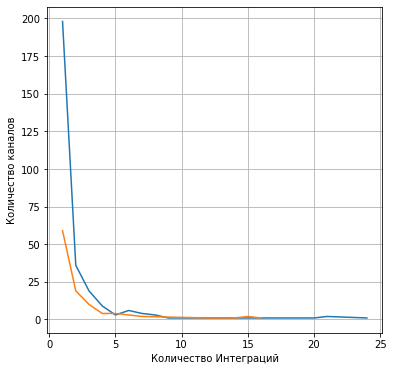

In [490]:
plt.figure(figsize=(6, 6))
plt.xlabel('Количество Интеграций')
plt.ylabel('Количество каналов')
plt.grid()
plt.plot(X_1,Y_1,X_2, Y_2)
plt.savefig('./jpg/fig_1.jpg')


In [491]:
indicators = channel_analysis[channel_analysis['quantity_placement_romi'] >= 4][['name', 'C1', 'C2', 'CPL', 'ROMI']]

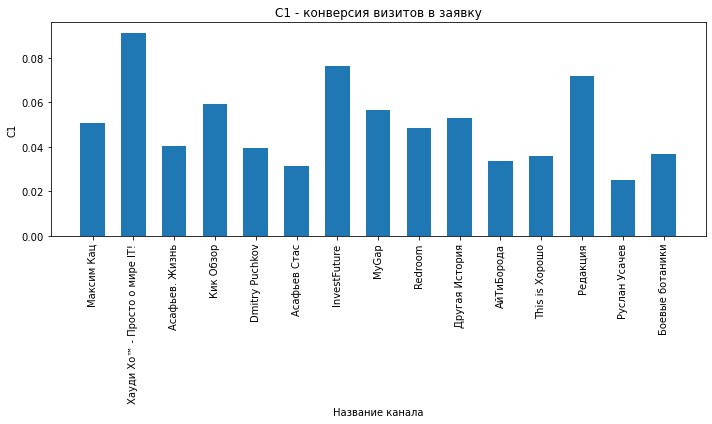

In [492]:
plt.figure(figsize=(10, 6))
plt.bar(indicators['name'], indicators['C1'], width = 0.6, align = 'center')
plt.xticks(rotation=90)
plt.title('C1 - конверсия визитов в заявку')
plt.xlabel('Название канала')
plt.ylabel('C1')
plt.tight_layout()
plt.savefig('./jpg/fig_2.jpg')

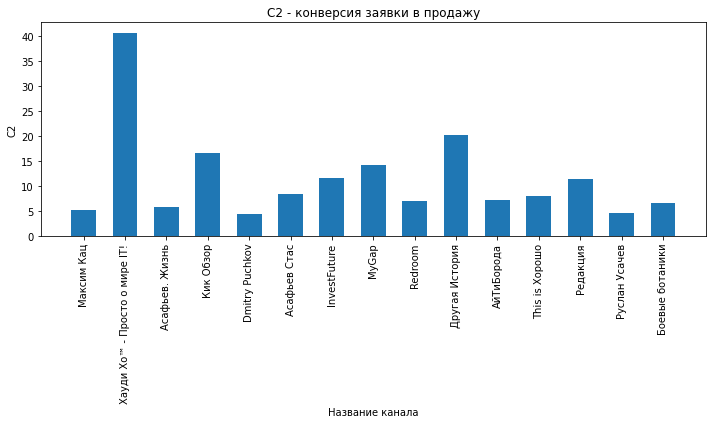

In [493]:
plt.figure(figsize=(10, 6))
plt.bar(indicators['name'], indicators['C2'], width = 0.6, align = 'center')
plt.xticks(rotation=90)
plt.title('C2 - конверсия заявки в продажу')
plt.xlabel('Название канала')
plt.ylabel('C2')
plt.tight_layout()
plt.savefig('./jpg/fig_3.jpg')

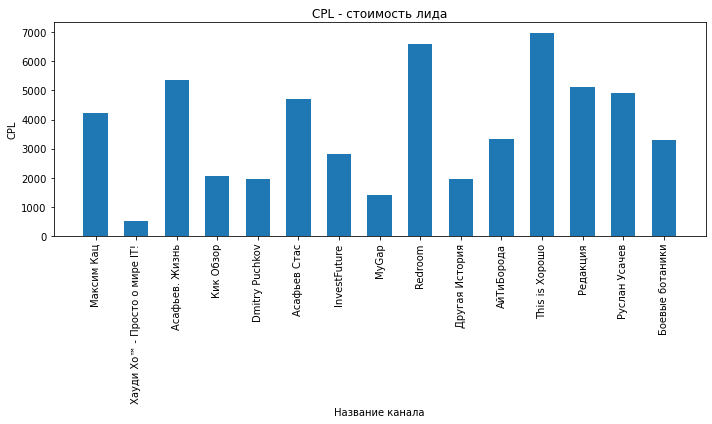

In [541]:
plt.figure(figsize=(10, 6))
plt.bar(indicators['name'], indicators['CPL'], width = 0.6, align = 'center')
plt.xticks(rotation=90)
plt.title('CPL - cтоимость лида')
plt.xlabel('Название канала')
plt.ylabel('CPL')
plt.tight_layout()
plt.savefig('./jpg/fig_4.jpg')

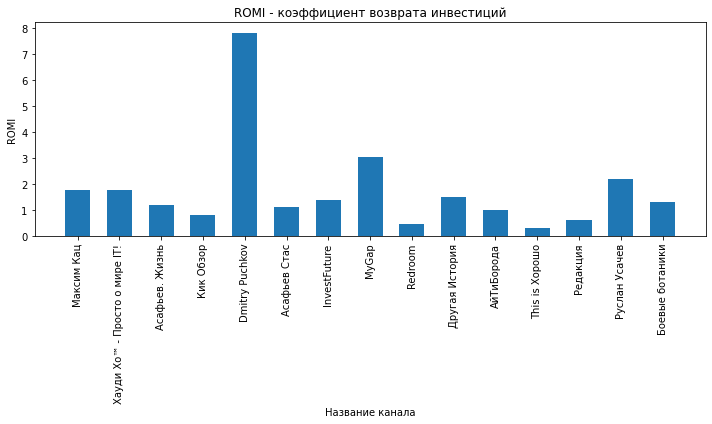

In [540]:
plt.figure(figsize=(10, 6))
plt.bar(indicators['name'], indicators['ROMI'], width = 0.6, align = 'center')
plt.xticks(rotation=90)
plt.title('ROMI - коэффициент возврата инвестиций')
plt.xlabel('Название канала')
plt.ylabel('ROMI')
plt.tight_layout()
plt.savefig('./jpg/fig_5.jpg')

In [496]:
# Каналы, принесшие прибыль менее 4 раз
romi_less_four = channel_analysis[channel_analysis['quantity_placement_romi'] < 4]['ROMI']
romi_less_four

7      4.027211
11     0.606675
12     4.045271
13     0.184722
17     0.781801
         ...   
280    0.000000
281   -1.000000
282    0.000000
283   -1.000000
284    2.576419
Name: ROMI, Length: 270, dtype: float64

In [497]:
profit_romi_less_four = 0
loss_romi_less_four = 0
for i in range(len(romi_less_four)):
    if romi_less_four.iloc[i] >= 0:
        profit_romi_less_four += romi_less_four.iloc[i]
    else: loss_romi_less_four += romi_less_four.iloc[i]
romi_for_bar = [profit_romi_less_four, loss_romi_less_four]
romi_for_bar

[174.8950278710283, -111.67621109145338]

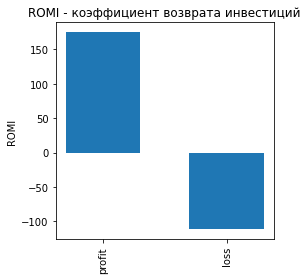

In [543]:
plt.figure(figsize=(4, 4))
plt.bar(['profit', 'loss'], romi_for_bar, width = 0.6, align = 'center')
plt.xticks(rotation=90)
plt.title('ROMI - коэффициент возврата инвестиций')
plt.ylabel('ROMI')
plt.tight_layout()
plt.savefig('./jpg/fig_6.jpg')

In [499]:
channel_analysis['ROMI'].sort_values(ascending = False)

154    22.805970
86     13.999318
170    12.200000
62     11.108872
4       7.815178
         ...    
138    -1.000000
137    -1.000000
129    -1.000000
128    -1.000000
142    -1.000000
Name: ROMI, Length: 285, dtype: float64

In [500]:
max_romi = [132, 54, 276, 74, 4]
channel_analysis.loc[max_romi,]

,name,quantity_placement,quantity_placement_romi,Расход,profit,Визиты Факт,Заявки Факт,Оплаты Факт,C1,C2,CPL,ROMI
132,Кибербол,1,0,25000.0,0.0,41.0,2.0,0.0,0.048780,inf,12500.000000,0.000000
54,Осторожно: Собчак,2,1,830000.0,-44575.0,1997.0,201.0,11.0,0.100651,18.272727,4129.353234,-0.053705
276,Утка в Трендах,1,0,60000.0,0.0,167.0,10.0,0.0,0.059880,inf,6000.000000,0.000000
74,Физика от Побединского,2,2,505806.0,761576.0,2440.0,164.0,23.0,0.067213,7.130435,3084.182927,1.505668
4,Dmitry Puchkov,14,14,1201000.0,9386029.0,15671.0,619.0,140.0,0.039500,4.421429,1940.226171,7.815178


### По столбцу video_date 

In [501]:
data['video_date_2'] = data['video_date'].dt.month

In [502]:
data['video_date_2'].value_counts()

4     63
10    62
9     54
7     52
6     52
3     52
12    48
8     48
11    45
2     45
1     40
5     24
Name: video_date_2, dtype: int64

In [503]:
data_group_date = data.groupby(by = ['video_date_2'])['profit'].sum()
data_group_date = data_group_date.sort_index()
data_group_date

video_date_2
1     1.886925e+06
2     2.306295e+06
3    -4.206330e+05
4     1.183164e+06
5     1.546647e+06
6     5.625194e+06
7     3.767320e+06
8     8.553638e+06
9     8.058126e+06
10    3.937835e+06
11    3.250402e+06
12   -9.246349e+05
Name: profit, dtype: float64

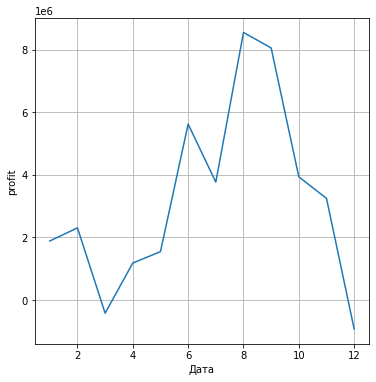

In [504]:
plt.figure(figsize=(6, 6))
plt.xlabel('Дата')
plt.ylabel('profit')
plt.grid()
plt.plot(data_group_date.index, data_group_date.values)
plt.savefig('./jpg/fig_7.jpg')

### По столбцу day_of_week 

In [505]:
data_group_day = data.groupby(by = ['day_of_week'])['profit'].mean()
data_group_day = data_group_day.sort_index()
data_group_day

day_of_week
Friday       34848.716049
Monday       30278.090675
Saturday     61997.488095
Sunday       61606.044118
Thursday     99676.485437
Tuesday      92450.543476
Wednesday    55755.119191
Name: profit, dtype: float64

In [506]:
data['day_of_week'].value_counts()

Tuesday      105
Thursday     103
Wednesday     87
Saturday      84
Friday        81
Sunday        68
Monday        57
Name: day_of_week, dtype: int64

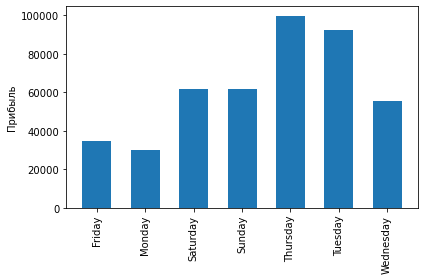

In [507]:
plt.figure(figsize=(6, 4))
plt.bar(data_group_day.index, data_group_day.values, width = 0.6, align = 'center')
plt.xticks(rotation=90)
plt.ylabel('Прибыль')
plt.tight_layout()
plt.savefig('./jpg/fig_8.jpg')

### По столбцу part_of_video_with_ad_from1_to_10

In [508]:
data['part_of_video_with_ad_from1_to_10'].value_counts()

2.0     166
1.0     126
3.0     102
4.0      87
5.0      51
6.0      27
7.0      17
8.0       5
9.0       2
10.0      1
Name: part_of_video_with_ad_from1_to_10, dtype: int64

In [509]:
data_group_part = data.groupby(by = ['part_of_video_with_ad_from1_to_10'])['profit'].mean()
data_group_part = data_group_part.sort_index()
data_group_part

part_of_video_with_ad_from1_to_10
1.0      35648.626984
2.0      36622.642187
3.0      95479.176471
4.0      70030.770115
5.0     103674.274510
6.0      75022.000000
7.0      91246.764706
8.0     535467.000000
9.0     494563.500000
10.0     27000.000000
Name: profit, dtype: float64

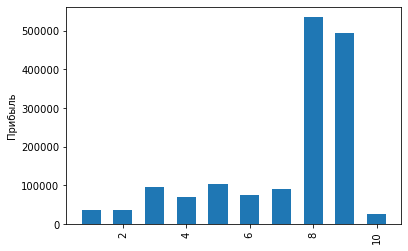

In [510]:
plt.figure(figsize=(6, 4))
plt.bar(data_group_part.index, data_group_part.values, width = 0.6, align = 'center')
plt.xticks(rotation=90)
plt.ylabel('Прибыль')
plt.savefig('./jpg/fig_9.jpg')

### По столбцу discount_percentage

In [511]:
data['discount_percentage'].value_counts()

45    223
50    166
55     88
0      52
35     23
60      8
40      8
10      7
25      5
15      3
20      2
Name: discount_percentage, dtype: int64

In [512]:
data_group_discount = data.groupby(by = ['discount_percentage'])['profit'].mean()
data_group_discount = data_group_discount.sort_index()
data_group_discount

discount_percentage
0      53693.365385
10     94650.428571
15     22433.333333
20    -10650.000000
25    102265.000000
35     80378.086957
40    115287.125000
45     61088.852018
50     96878.876112
55     31934.956460
60    -65954.000000
Name: profit, dtype: float64

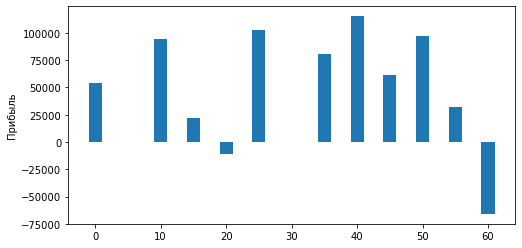

In [513]:
plt.figure(figsize=(8, 4))
plt.bar(data_group_discount.index, data_group_discount.values, width = 2, align = 'center')
#plt.xticks(rotation=90)
plt.ylabel('Прибыль')
plt.savefig('./jpg/fig_10.jpg')

### По столбцу discount_until_date

In [514]:
data_discount_until = data[data['discount_percentage'] != 0][['discount_until_date', 'profit', 'video_date']].copy()

In [515]:
data_discount_until

,discount_until_date,profit,video_date
2,15.02.2020,253500.0,2020-01-23 13:33:38
3,31.01.2020,261000.0,2020-01-24 18:33:25
4,15.02.2020,155000.0,2020-01-24 04:44:31
5,0,66010.0,2020-01-28 16:48:50
7,0,-75000.0,2020-01-20 17:57:56
...,...,...,...
580,0,-5500.0,2021-04-27 14:06:19
581,0,-12000.0,2021-04-29 11:30:05
582,04.05.2021,-22000.0,2021-04-27 13:27:44
583,0,464732.0,2021-04-29 06:00:02


In [516]:
data_discount_until.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533 entries, 2 to 584
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   discount_until_date  533 non-null    object        
 1   profit               533 non-null    float64       
 2   video_date           533 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 16.7+ KB


In [517]:
data_discount_until['until_date'] = data_discount_until['discount_until_date'].apply(lambda x: 1 if x != 0 else 0)

In [518]:
data_discount_until

,discount_until_date,profit,video_date,until_date
2,15.02.2020,253500.0,2020-01-23 13:33:38,1
3,31.01.2020,261000.0,2020-01-24 18:33:25,1
4,15.02.2020,155000.0,2020-01-24 04:44:31,1
5,0,66010.0,2020-01-28 16:48:50,0
7,0,-75000.0,2020-01-20 17:57:56,0
...,...,...,...,...
580,0,-5500.0,2021-04-27 14:06:19,0
581,0,-12000.0,2021-04-29 11:30:05,0
582,04.05.2021,-22000.0,2021-04-27 13:27:44,1
583,0,464732.0,2021-04-29 06:00:02,0


In [519]:
data_until_date = data_discount_until.groupby(by = ['until_date'])['profit'].mean()
data_until_date

until_date
0    95335.548077
1    60753.672734
Name: profit, dtype: float64

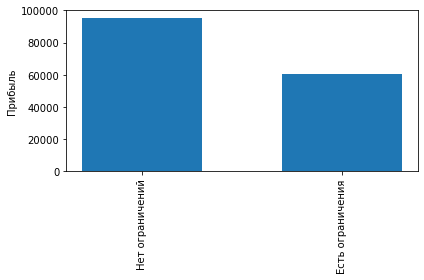

In [520]:
plt.figure(figsize=(6, 4))
plt.bar(['Нет ограничений', 'Есть ограничения'], data_until_date.values, width = 0.6, align = 'center')
plt.xticks(rotation=90)
plt.ylabel('Прибыль')
plt.tight_layout()
plt.savefig('./jpg/fig_11.jpg')

In [521]:
ind = data_discount_until[data_discount_until['discount_until_date'] == 0].index

In [522]:
data_discount_until = data_discount_until.drop(ind)

In [523]:
data_discount_until[data_discount_until['discount_until_date'] == '2021-01-31']

,discount_until_date,profit,video_date,until_date
433,2021-01-31,0.0,2021-01-20 09:28:26,1


In [524]:
data_discount_until.loc[55, 'discount_until_date'] = '10.06.2020'
data_discount_until.loc[84, 'discount_until_date'] = '15.07.2020'
data_discount_until.loc[382, 'discount_until_date'] = '28.12.2020'
data_discount_until.loc[433, 'discount_until_date'] = '31.01.2021'

In [525]:
data_discount_until

,discount_until_date,profit,video_date,until_date
2,15.02.2020,253500.0,2020-01-23 13:33:38,1
3,31.01.2020,261000.0,2020-01-24 18:33:25,1
4,15.02.2020,155000.0,2020-01-24 04:44:31,1
9,25.03.2020,-7500.0,2020-02-27 13:58:29,1
10,07.03.2020,115325.0,2020-02-29 15:21:13,1
...,...,...,...,...
572,30.04.2021,-76206.0,2021-04-22 13:02:59,1
573,01.05.2021,327056.0,2021-04-22 20:30:25,1
576,10.05.2021,-231943.0,2021-04-24 08:45:14,1
578,03.05.2021,-174803.0,2021-04-25 05:58:47,1


In [526]:
for i in data_discount_until.index:
    if len(data_discount_until.loc[i, 'discount_until_date']) != 10:
        print(i)

171
435


In [527]:
data_discount_until.loc[[171, 435], 'discount_until_date']

171      1.09.2020
435    ‌31.01.2021
Name: discount_until_date, dtype: object

In [528]:
data_discount_until.loc[171, 'discount_until_date'] = '01.09.2020'
data_discount_until.loc[435, 'discount_until_date'] = '31.01.2021'

In [529]:
for i in data_discount_until.index:
    prov = data_discount_until.loc[i, 'discount_until_date'].split('.')
    if int(prov[1]) in [4, 6, 9, 11]:
        if int(prov[0]) > 30:
            print(i)

205
301
440


In [530]:
data_discount_until.loc[[205, 301, 440], 'discount_until_date']

205    31.09.2020
301    31.11.2020
440    31.04.2021
Name: discount_until_date, dtype: object

In [531]:
data_discount_until.loc[205, 'discount_until_date'] = '30.09.2020'
data_discount_until.loc[301, 'discount_until_date'] = '30.11.2020'
data_discount_until.loc[440, 'discount_until_date'] = '30.04.2020'

In [532]:
data_discount_until['discount_until_date'] = pd.to_datetime(data_discount_until['discount_until_date'], dayfirst=True, format='%d.%m.%Y')

In [533]:
data_discount_until['time_range'] = data_discount_until['discount_until_date'] - data_discount_until['video_date']

In [534]:
data_discount_until['time_range'] = data_discount_until['time_range'].dt.days

In [535]:
data_discount_until

,discount_until_date,profit,video_date,until_date,time_range
2,2020-02-15,253500.0,2020-01-23 13:33:38,1,22
3,2020-01-31,261000.0,2020-01-24 18:33:25,1,6
4,2020-02-15,155000.0,2020-01-24 04:44:31,1,21
9,2020-03-25,-7500.0,2020-02-27 13:58:29,1,26
10,2020-03-07,115325.0,2020-02-29 15:21:13,1,6
...,...,...,...,...,...
572,2021-04-30,-76206.0,2021-04-22 13:02:59,1,7
573,2021-05-01,327056.0,2021-04-22 20:30:25,1,8
576,2021-05-10,-231943.0,2021-04-24 08:45:14,1,15
578,2021-05-03,-174803.0,2021-04-25 05:58:47,1,7


In [536]:
ind = data_discount_until[data_discount_until['time_range'] <0].index
data_discount_until = data_discount_until.drop(ind)

In [537]:
data_discount_until['time_range'].value_counts()

13     29
7      24
14     23
9      22
20     20
8      20
12     19
15     17
11     16
10     15
17     15
5      14
2      14
16     14
22     14
4      13
21     13
6      13
19     12
18     11
24      9
23      9
1       8
28      7
25      7
26      6
27      5
29      5
30      5
3       5
32      3
33      3
35      3
34      2
38      2
31      2
338     1
71      1
40      1
41      1
42      1
0       1
Name: time_range, dtype: int64

In [538]:
date_delta = data_discount_until.groupby(by = ['time_range'])['profit'].mean()
date_delta

time_range
0      -10000.000000
1      -42324.125000
2       31550.928571
3      -86330.000000
4      102950.182275
5       18823.000000
6       18049.230769
7       38274.291667
8       45650.100000
9       46268.545455
10      16233.666667
11      53248.500000
12      42085.526316
13      91860.724138
14      90978.173913
15     -14806.231470
16     289775.500000
17      14655.200000
18      25758.636364
19     121201.833333
20       3717.650000
21      80146.000000
22     137210.428571
23        288.222222
24       8971.888889
25     -27135.857143
26      15510.833333
27      15124.000000
28      83577.000000
29      24984.400000
30      81448.800000
31     313778.500000
32     535628.333333
33     552250.333333
34     238973.000000
35     -80000.000000
38     360803.500000
40     -81000.000000
41          0.000000
42     -80000.000000
71      -5000.000000
338         0.000000
Name: profit, dtype: float64

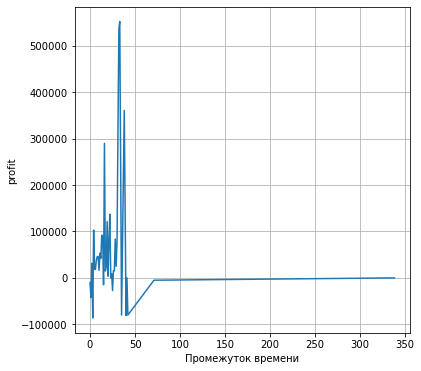

In [539]:
plt.figure(figsize=(6, 6))
plt.xlabel('Промежуток времени')
plt.ylabel('profit')
plt.grid()
plt.plot(date_delta.index, date_delta.values)
plt.savefig('./jpg/fig_12.jpg')